In [102]:
# Bibliotheken laden
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde
from plotnine import *

In [103]:
# Daten laden
olympics = pd.read_csv("olympics.csv")

In [104]:
# Übersicht verschaffen
olympics

ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1988 Winter  1988  Winter         Calgary   
...                ...  ...          ...   ...     ...             ...   
271111        Poland-1  POL  1976 Winter  1976  Winter       Innsbruck   
271112          Poland  POL  2014 Winter  2014  Winter           Sochi   
271113          Poland  POL  2014 Winter  2014  Winter           Sochi   
271114          Poland  POL  1998 Winter  1998  Winter          Nagano   
271115          Poland  POL  2002 Winter  2002  Winter  Salt Lake City   

                Sport                                     Event Medal  
0          Basketball               Basketball Men's Basketball   NaN  
1                Judo              Judo Men's Extra-Lightweight   NaN  
2            Football                   Football Men's Football   NaN  
3          Tug-Of-War               Tug-Of-War Men's Tug-Of-War  Gold  
4       Speed Skating          Speed Skating Women's 500 metres   NaN  
...               ...                                       ...   ...  
271111           Luge                Luge Mixed (Men)'s Doubles   NaN  
271112    Ski Jumping  Ski Jumping Men's Large Hill, Individual   NaN  
271113    Ski Jumping        Ski Jumping Men's Large Hill, Team   NaN  
271114      Bobsleigh                      Bobsleigh Men's Four   NaN  
271115      Bobsleigh                      Bobsleigh Men's Four   NaN  

[271116 rows x 15 columns]

In [105]:
#Übersicht der Spalten
olympics.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [106]:
# Übersicht des Datensatzes
olympics.shape

(271116, 15)

In [107]:
# Statistik generieren -> auffällig ist, dass das Mindestalter von zehn Jahren uund Höchstalter von 97 Jahren
olympics.describe()

ID            Age         Height         Weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168.000000      60.000000   
50%     68205.000000      24.000000     175.000000      70.000000   
75%    102097.250000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                Year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000

Es ist zu erkennen, dass die Höhe in cm und das Gewicht in Kilogramm gemessen wurden.

In [108]:
# Überprüfen der Nullwerte -> muss aber nicht zwingend Fehler beinhalten
olympics.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [109]:
# Datentypen überprüfen
olympics.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

# LE1 Visualization basics, chart types

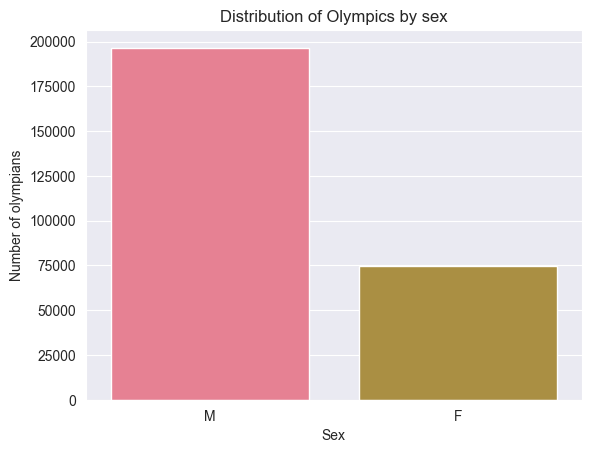

In [110]:
ax = sns.countplot(x='Sex', data=olympics)
plt.title('Distribution of Olympics by sex')
plt.ylabel('Number of olympians')
plt.show()

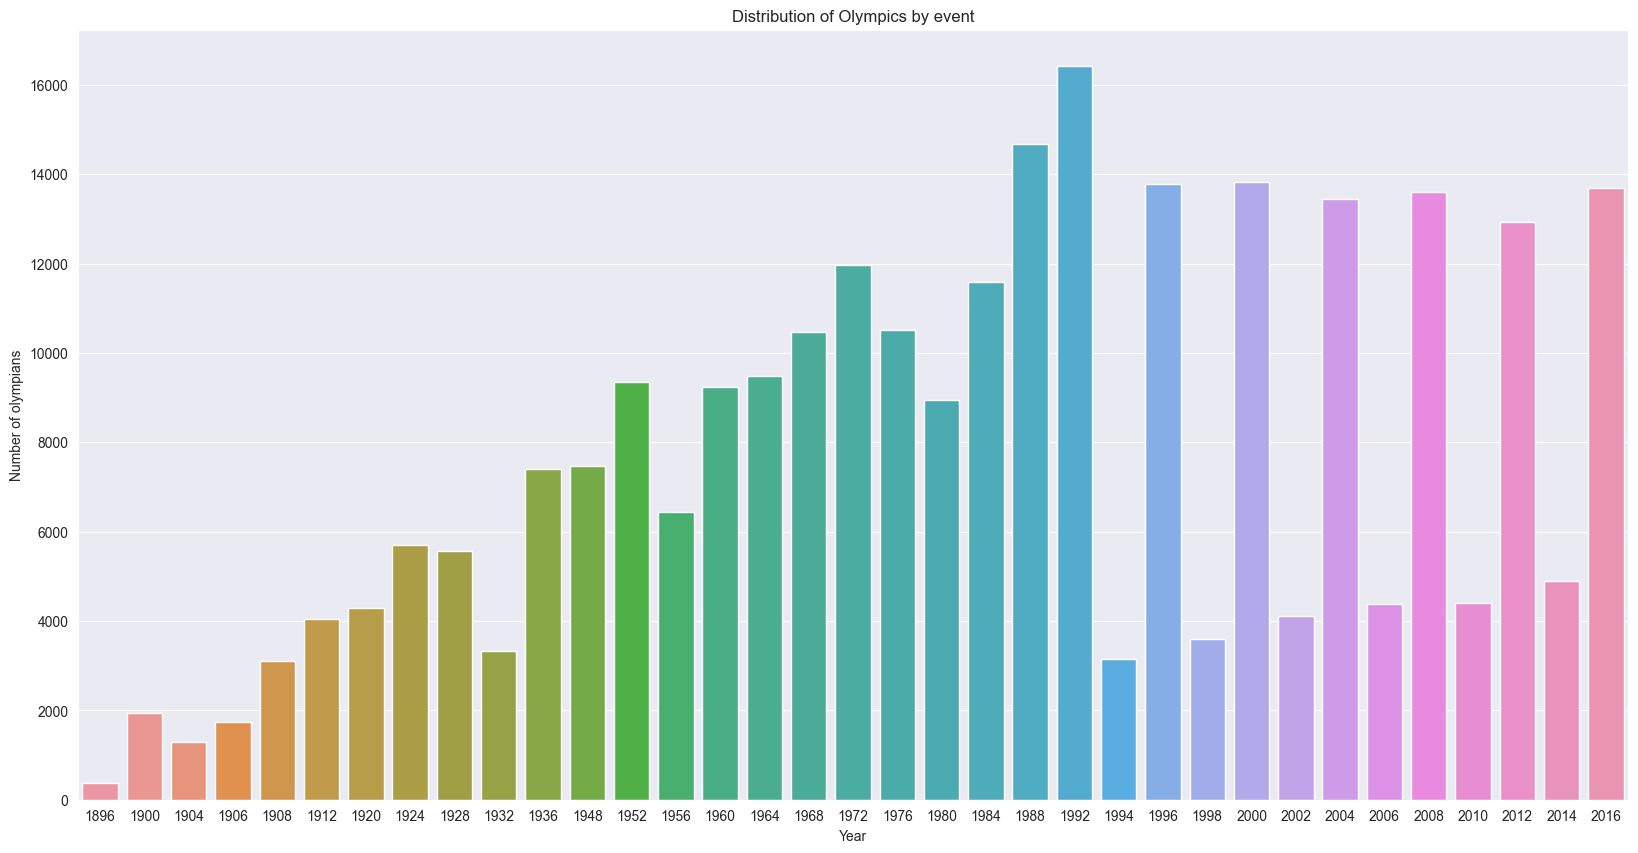

In [111]:
plt.figure(figsize=(20,10))
sns.countplot(x='Year', data=olympics)
plt.title('Distribution of Olympics by event')
plt.ylabel('Number of olympians')
plt.show()

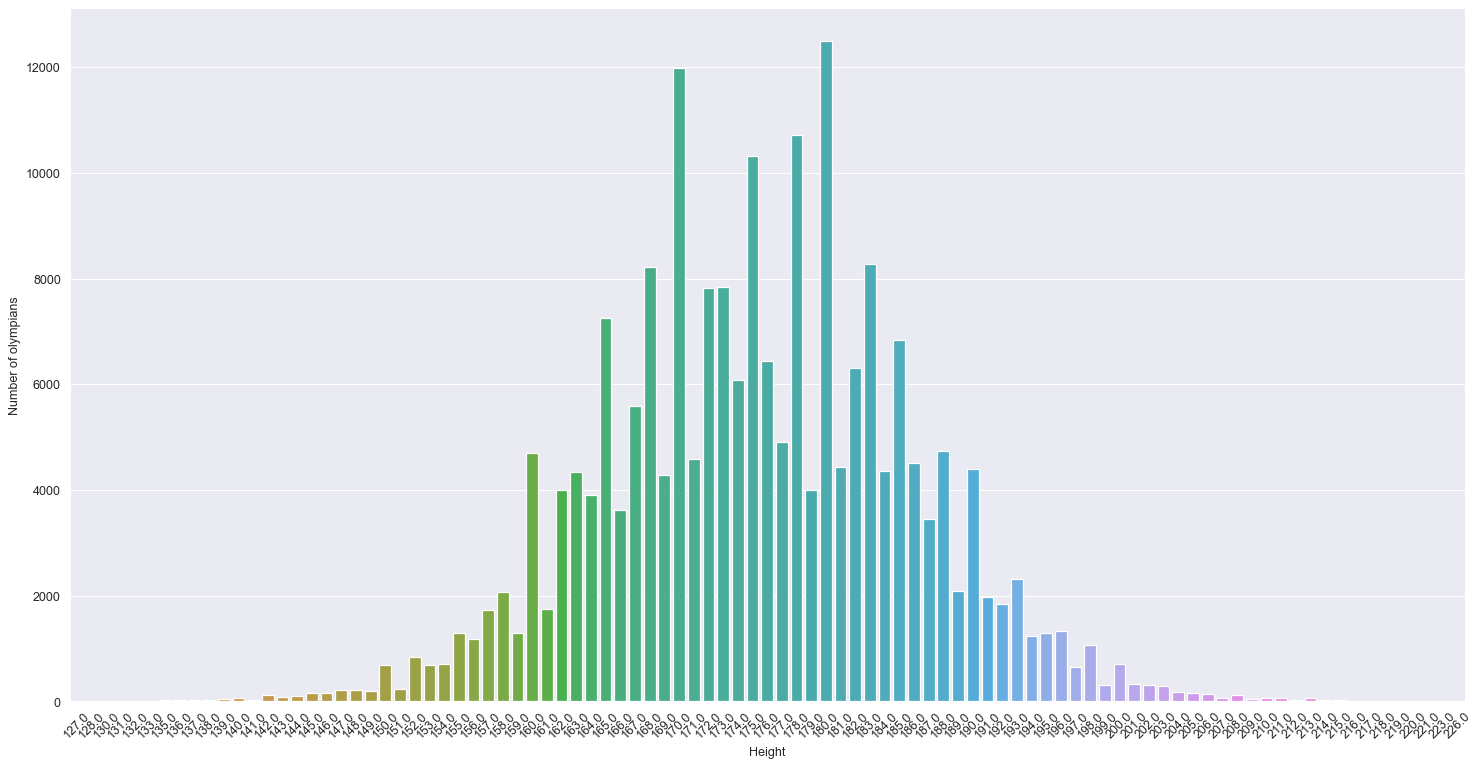

In [112]:
plt.figure(figsize=(20,10), dpi=90)
ax = sns.countplot(x='Height', data=olympics)
plt.xticks(rotation=45)
plt.xlabel('Height')
plt.ylabel('Number of olympians')
plt.show()

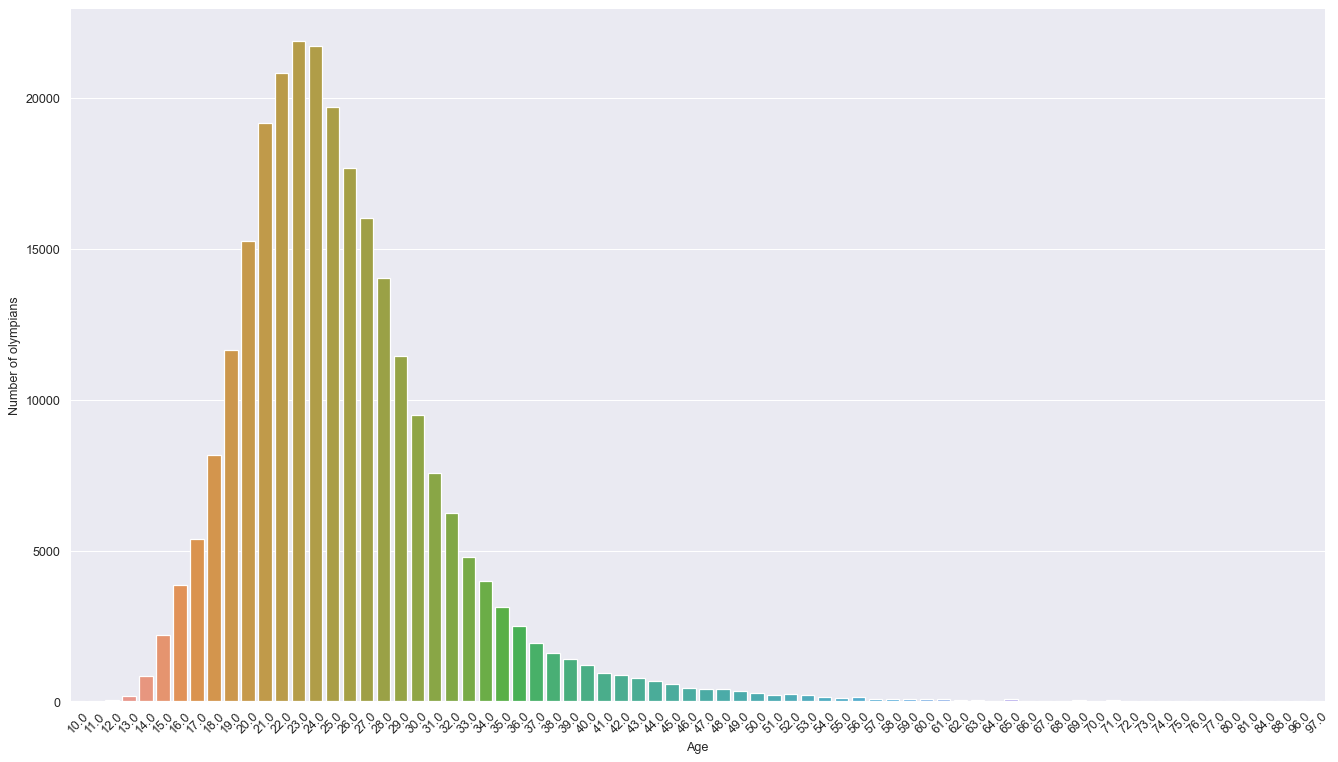

In [113]:
plt.figure(figsize=(18,10), dpi=90)
ax = sns.countplot(x='Age', data=olympics)
plt.xticks(rotation=45)
plt.xlabel('Age')
plt.ylabel('Number of olympians')
plt.show()

/var/folders/5l/8fvb5kzs1_s2cq12n2mb3tlw0000gn/T/ipykernel_1838/321973296.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



<AxesSubplot: xlabel='Age', ylabel='Density'>

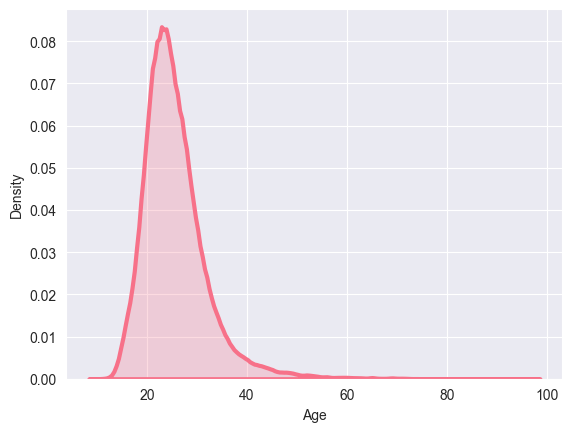

In [114]:
sns.distplot(olympics['Age'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = 'Sex')

/var/folders/5l/8fvb5kzs1_s2cq12n2mb3tlw0000gn/T/ipykernel_1838/3343614902.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



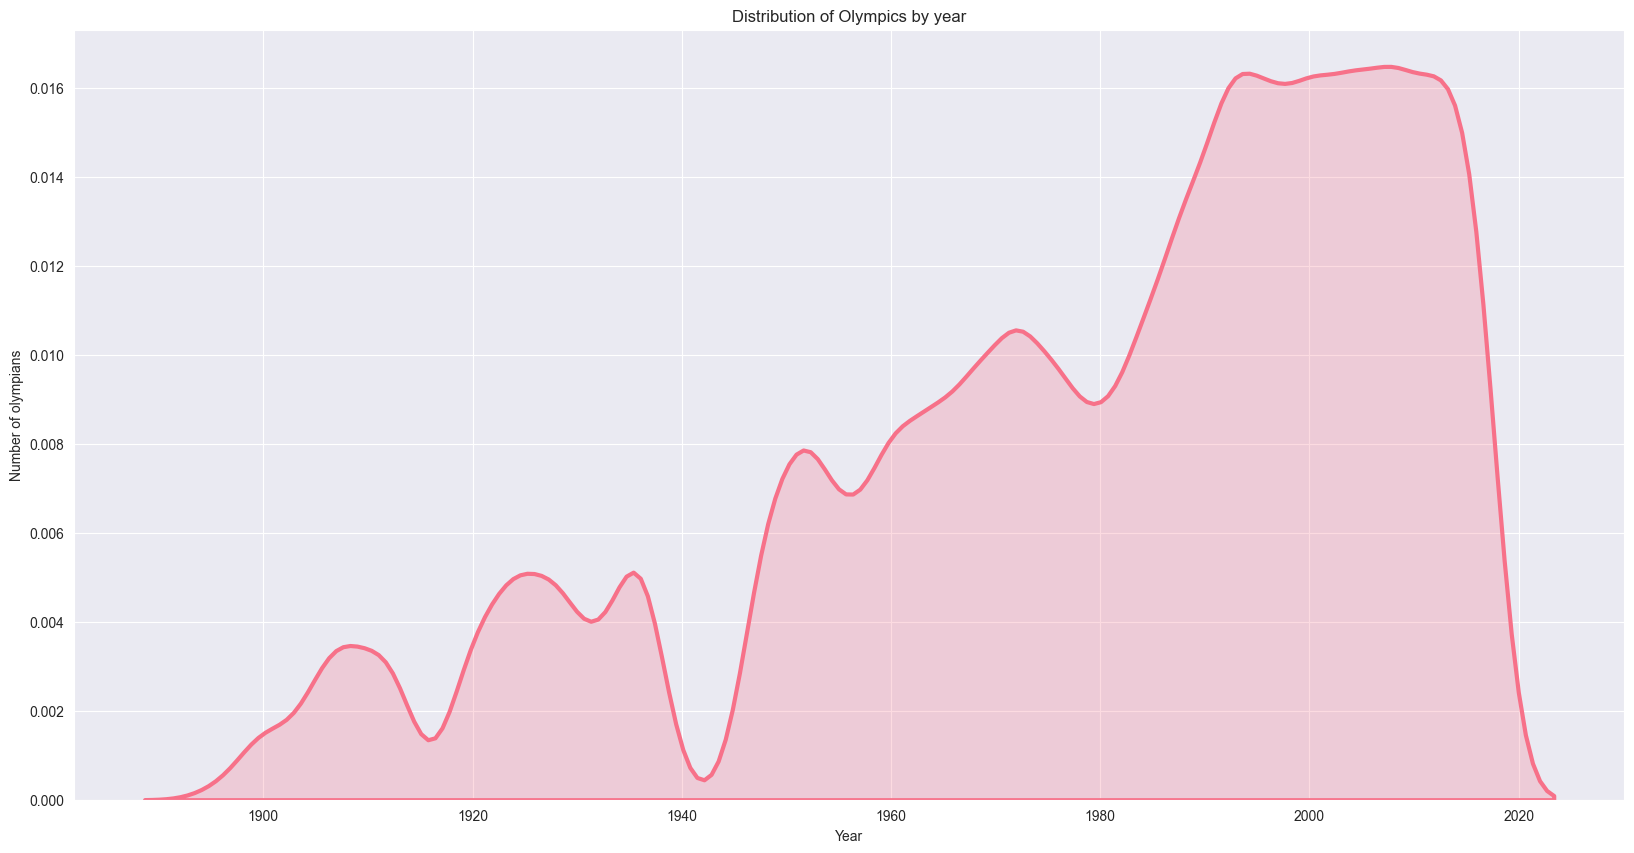

In [115]:
plt.figure(figsize=(20,10))
sns.distplot(olympics['Year'], hist = False, kde = True,
                    kde_kws = {'shade': True, 'linewidth': 3},
                    label = 'Year')
plt.title('Distribution of Olympics by year')
plt.ylabel('Number of olympians')
plt.show()

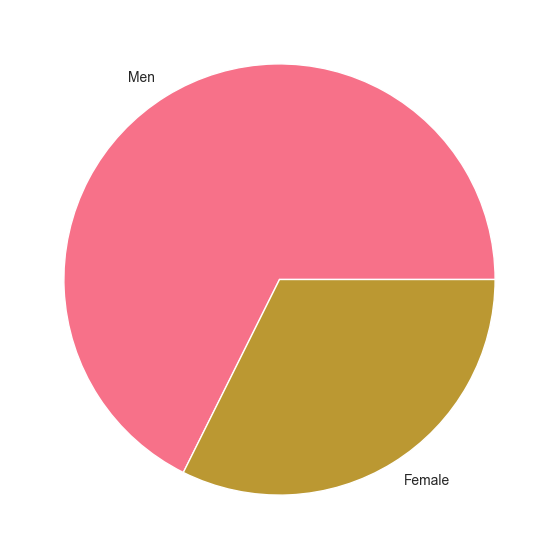

In [116]:
sex = ['Men', 'Female']
data = [139454, 66711]
 
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = sex)

plt.show()

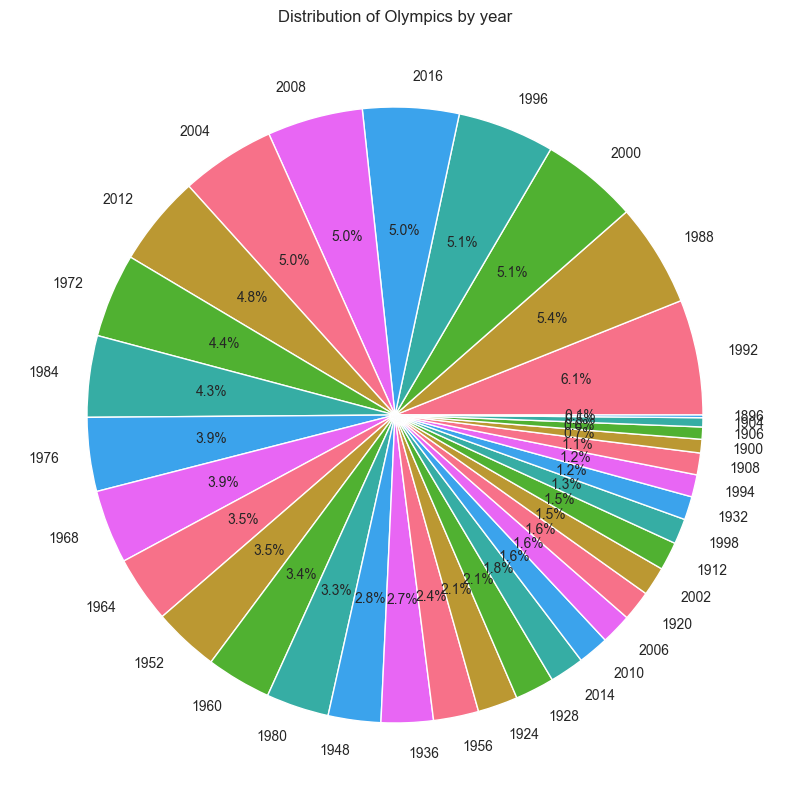

In [117]:
plt.figure(figsize=(20,10))
plt.pie(olympics['Year'].value_counts(), labels=olympics['Year'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Olympics by year')
plt.show()

In [118]:
olympics_1992_summer = olympics[(olympics.Season == 'Summer') & (olympics.Year >= 1992)]
olympics_1992_summer

ID                          Name Sex   Age  Height  Weight  \
0            1                     A Dijiang   M  24.0   180.0    80.0   
1            2                      A Lamusi   M  23.0   170.0    60.0   
31          12             Jyri Tapani Aalto   M  31.0   172.0    70.0   
32          13            Minna Maarit Aalto   F  30.0   159.0    55.5   
33          13            Minna Maarit Aalto   F  34.0   159.0    55.5   
...        ...                           ...  ..   ...     ...     ...   
271105  135565      Fernando scar Zylberberg   M  23.0   168.0    76.0   
271106  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
271108  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
271109  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
271110  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

             Team  NOC        Games  Year  Season            City       Sport  \
0           China  CHN  1992 Summer  1992  Summer       Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer          London        Judo   
31        Finland  FIN  2000 Summer  2000  Summer          Sydney   Badminton   
32        Finland  FIN  1996 Summer  1996  Summer         Atlanta     Sailing   
33        Finland  FIN  2000 Summer  2000  Summer          Sydney     Sailing   
...           ...  ...          ...   ...     ...             ...         ...   
271105  Argentina  ARG  2000 Summer  2000  Summer          Sydney      Hockey   
271106  Argentina  ARG  2004 Summer  2004  Summer          Athina      Hockey   
271108     Russia  RUS  2000 Summer  2000  Summer          Sydney      Rowing   
271109     Russia  RUS  2004 Summer  2004  Summer          Athina      Rowing   
271110    Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro  Basketball   

                                         Event Medal  
0                  Basketball Men's Basketball   NaN  
1                 Judo Men's Extra-Lightweight   NaN  
31                     Badminton Men's Singles   NaN  
32                  Sailing Women's Windsurfer   NaN  
33                  Sailing Women's Windsurfer   NaN  
...                                        ...   ...  
271105                     Hockey Men's Hockey   NaN  
271106                     Hockey Men's Hockey   NaN  
271108  Rowing Men's Lightweight Coxless Fours   NaN  
271109  Rowing Men's Lightweight Coxless Fours   NaN  
271110           Basketball Women's Basketball   NaN  

[94231 rows x 15 columns]

# LE2 Visual perception

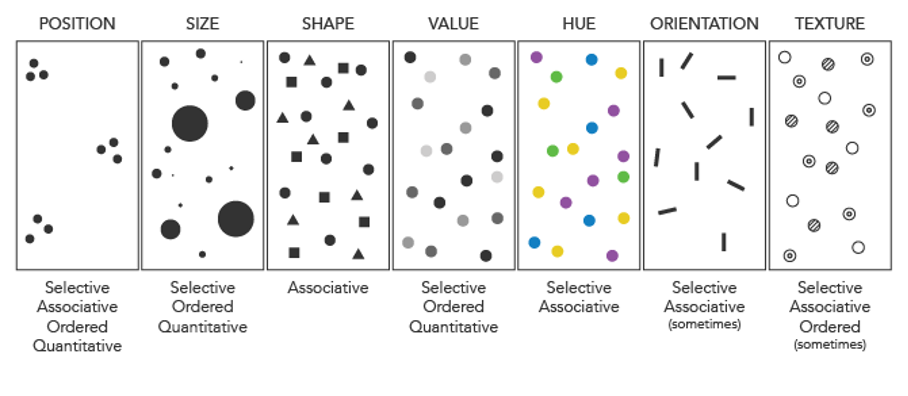

### Grundlage

In [119]:
olympics_1992_le2 = olympics[(olympics.Season == 'Summer') & (olympics.Year >= 2008) & (olympics.Medal == 'Gold') & (olympics.Sex == 'M')]
olympics_1992_le2

ID                              Name Sex   Age  Height  Weight  \
172         72  Aleksey Aleksandrovich Abalmasov   M  28.0   180.0    83.0   
173         73                         Luc Abalo   M  23.0   182.0    86.0   
174         73                         Luc Abalo   M  27.0   182.0    86.0   
200         93                    Jol Marc Abati   M  38.0   190.0    85.0   
1045       583                    Julien Absalon   M  27.0   180.0    68.0   
...        ...                               ...  ..   ...     ...     ...   
270433  135269                           Zou Kai   M  20.0   158.0    55.0   
270434  135269                           Zou Kai   M  24.0   158.0    55.0   
270435  135269                           Zou Kai   M  24.0   158.0    55.0   
270439  135270                       Zou Shiming   M  27.0   165.0    49.0   
270440  135270                       Zou Shiming   M  31.0   165.0    49.0   

           Team  NOC        Games  Year  Season     City       Sport  \
172     Belarus  BLR  2008 Summer  2008  Summer  Beijing    Canoeing   
173      France  FRA  2008 Summer  2008  Summer  Beijing    Handball   
174      France  FRA  2012 Summer  2012  Summer   London    Handball   
200      France  FRA  2008 Summer  2008  Summer  Beijing    Handball   
1045     France  FRA  2008 Summer  2008  Summer  Beijing     Cycling   
...         ...  ...          ...   ...     ...      ...         ...   
270433    China  CHN  2008 Summer  2008  Summer  Beijing  Gymnastics   
270434    China  CHN  2012 Summer  2012  Summer   London  Gymnastics   
270435    China  CHN  2012 Summer  2012  Summer   London  Gymnastics   
270439    China  CHN  2008 Summer  2008  Summer  Beijing      Boxing   
270440    China  CHN  2012 Summer  2012  Summer   London      Boxing   

                                            Event Medal  
172      Canoeing Men's Kayak Fours, 1,000 metres  Gold  
173                       Handball Men's Handball  Gold  
174                       Handball Men's Handball  Gold  
200                       Handball Men's Handball  Gold  
1045    Cycling Men's Mountainbike, Cross-Country  Gold  
...                                           ...   ...  
270433            Gymnastics Men's Horizontal Bar  Gold  
270434           Gymnastics Men's Team All-Around  Gold  
270435            Gymnastics Men's Floor Exercise  Gold  
270439               Boxing Men's Light-Flyweight  Gold  
270440               Boxing Men's Light-Flyweight  Gold  

[1043 rows x 15 columns]

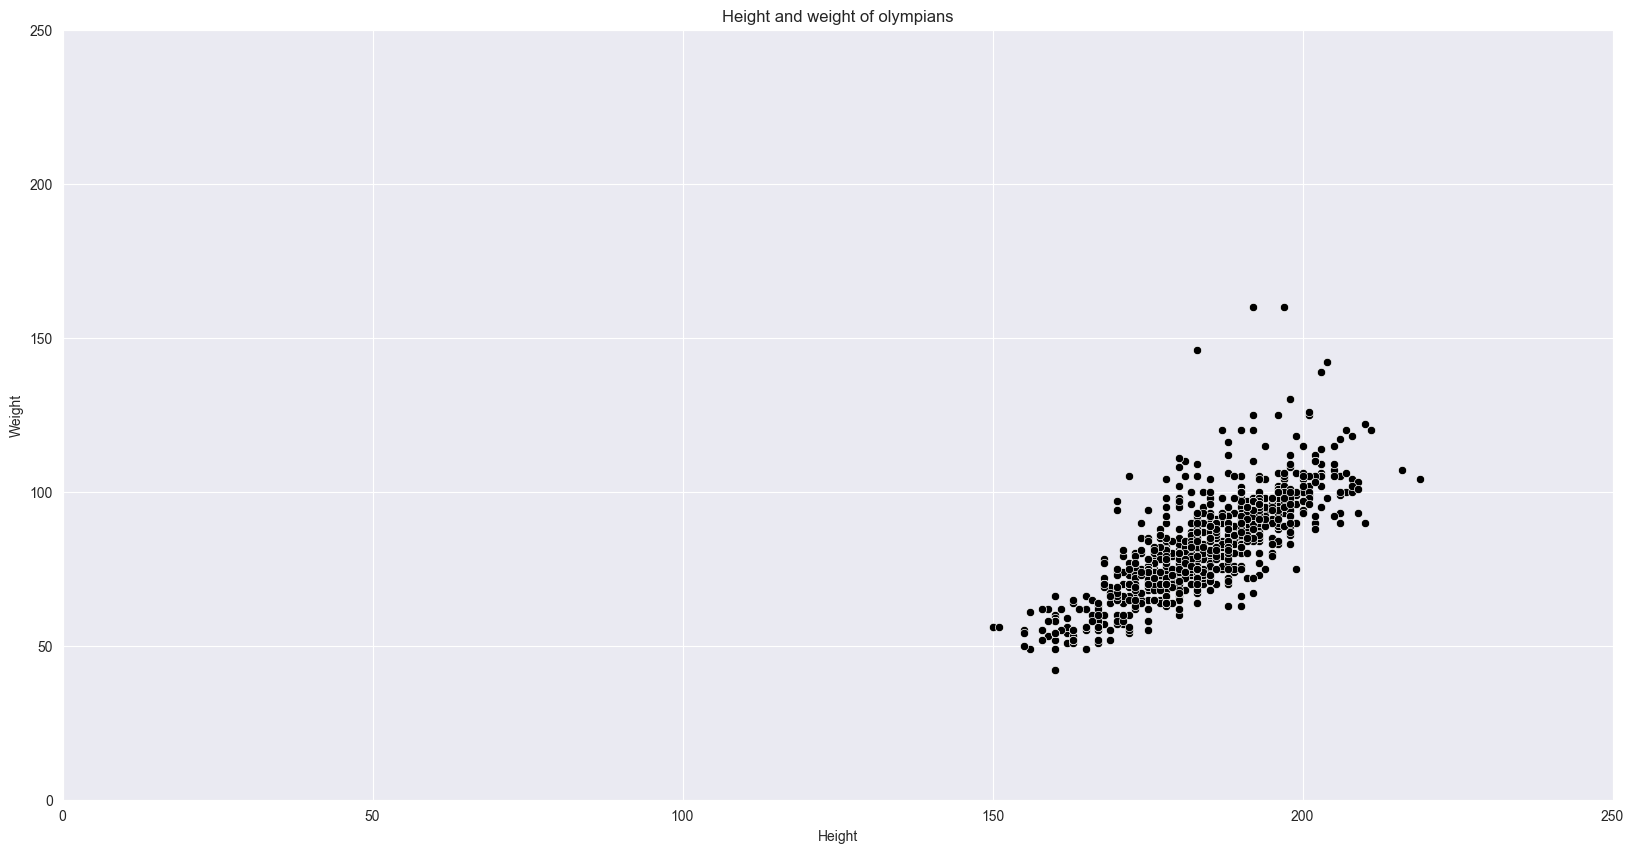

In [120]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Height', y='Weight', data=olympics_1992_le2, color = 'black')
plt.xlim(0, 250)
plt.ylim(0, 250)
plt.title('Height and weight of olympians')
plt.show()

### Position

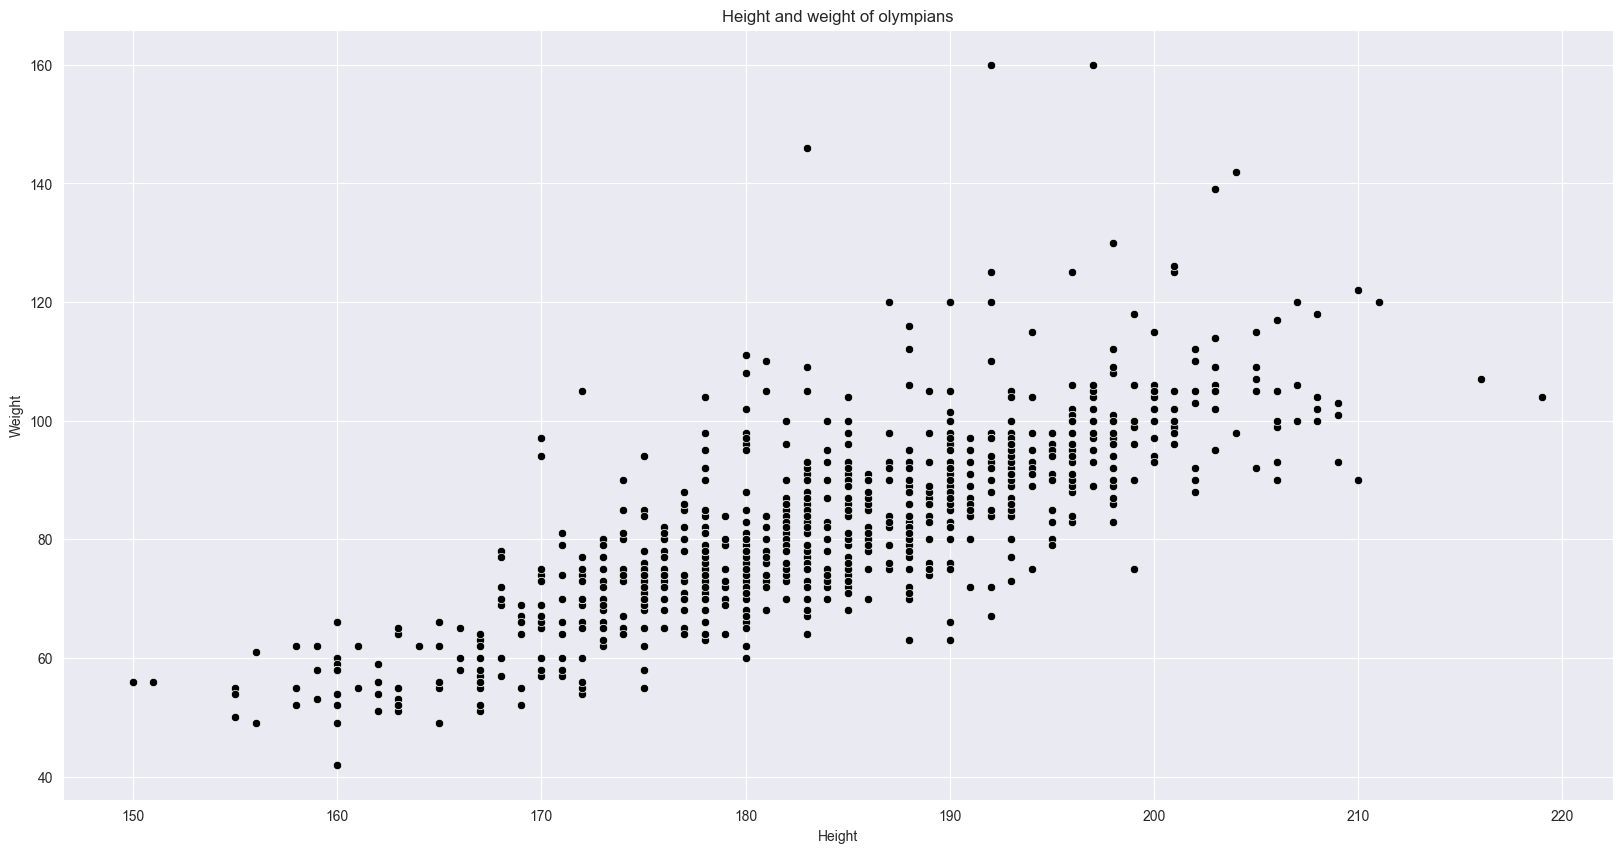

In [121]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Height', y='Weight', data=olympics_1992_le2, color = 'black')
plt.title('Height and weight of olympians')
plt.show()

### Grösse

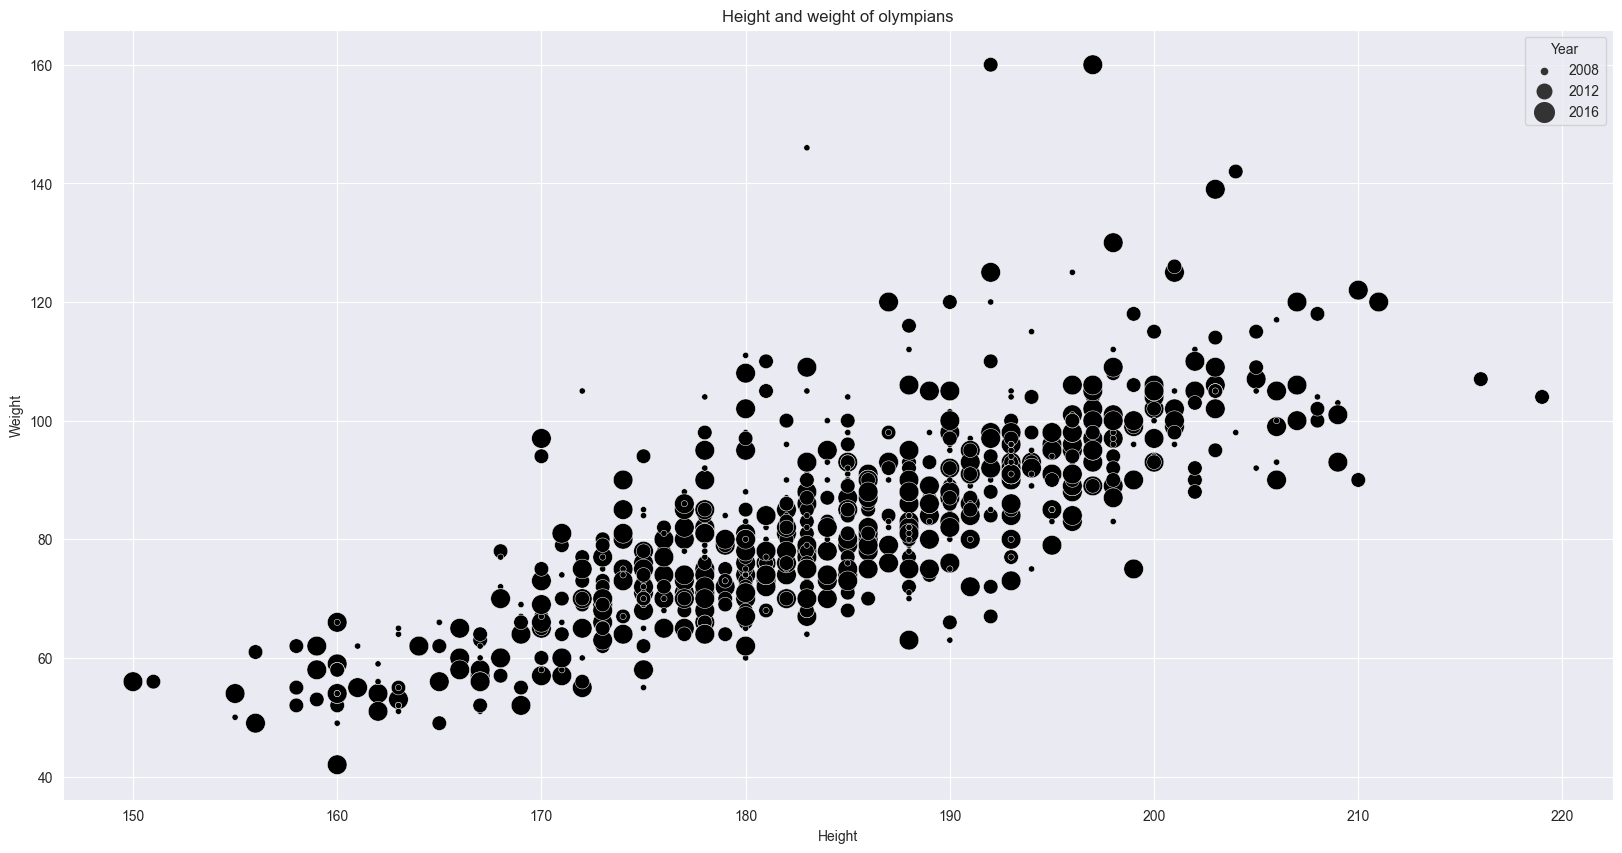

In [122]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Height', y='Weight', data=olympics_1992_le2, color = 'black', size='Year', sizes=(20, 200))
plt.title('Height and weight of olympians')
plt.show()

### Form

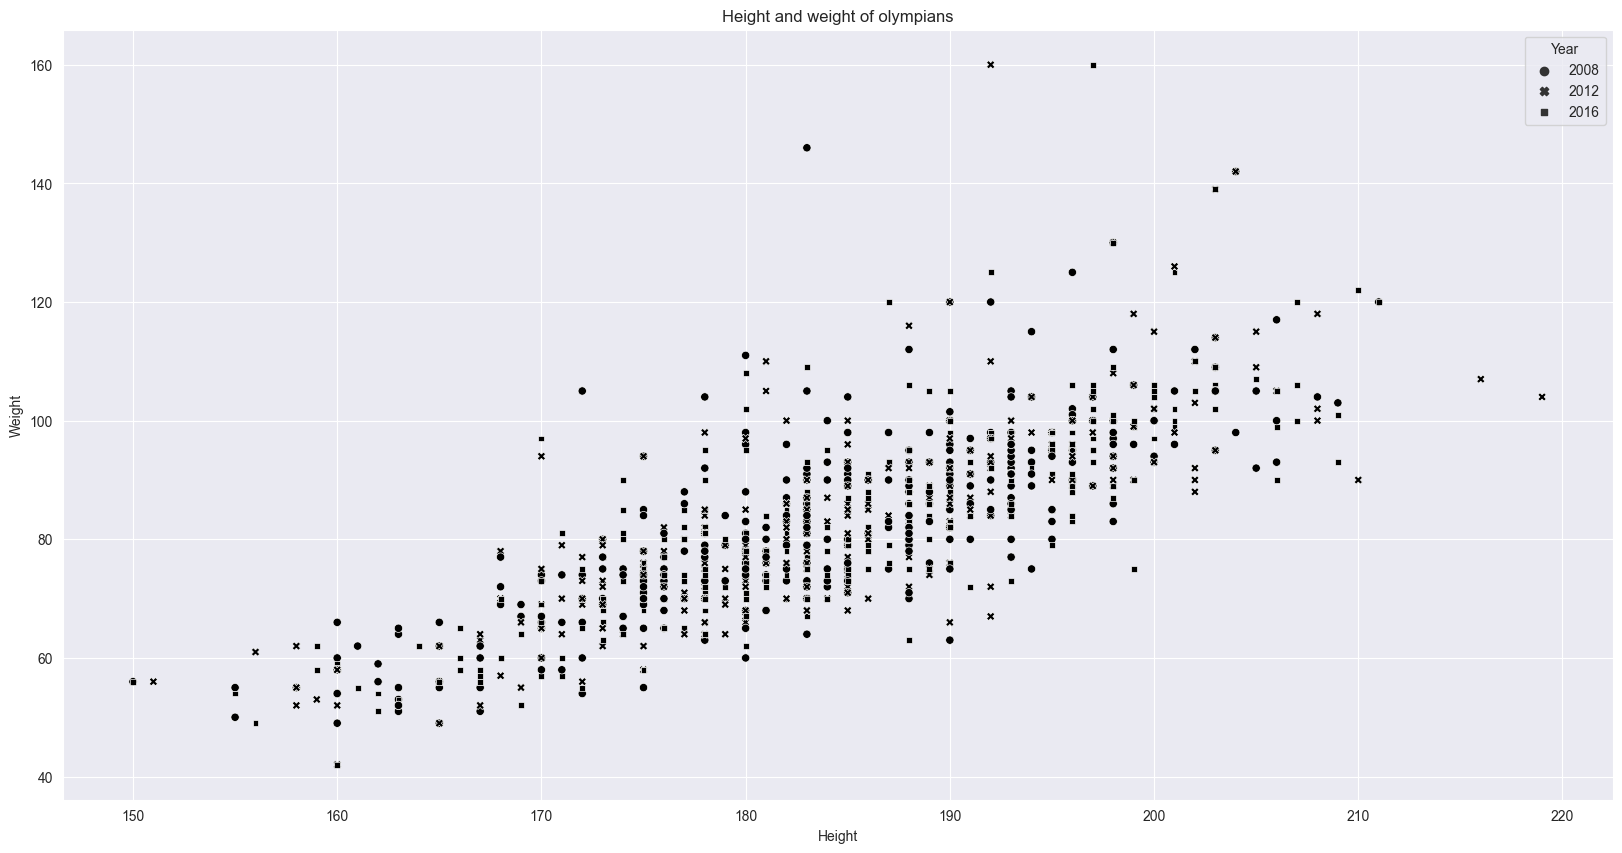

In [123]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Height', y='Weight', data=olympics_1992_le2, style='Year', color = 'black')
plt.title('Height and weight of olympians')
plt.show()

### Farbwert

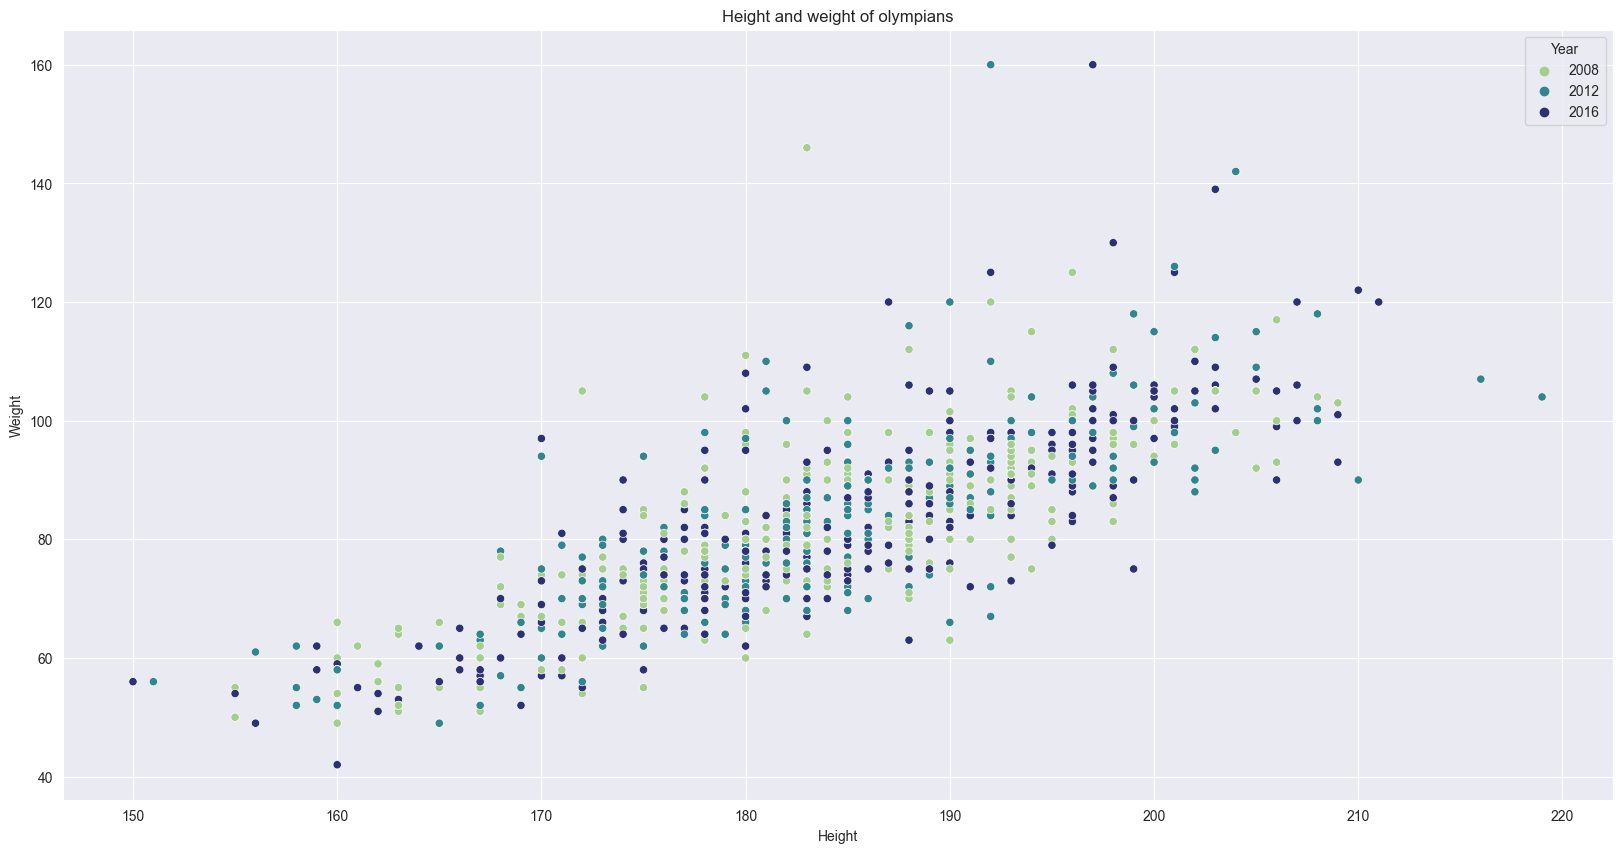

In [124]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Height', y='Weight', data=olympics_1992_le2, hue='Year', palette='crest')
plt.title('Height and weight of olympians')
plt.show()

### Farbton

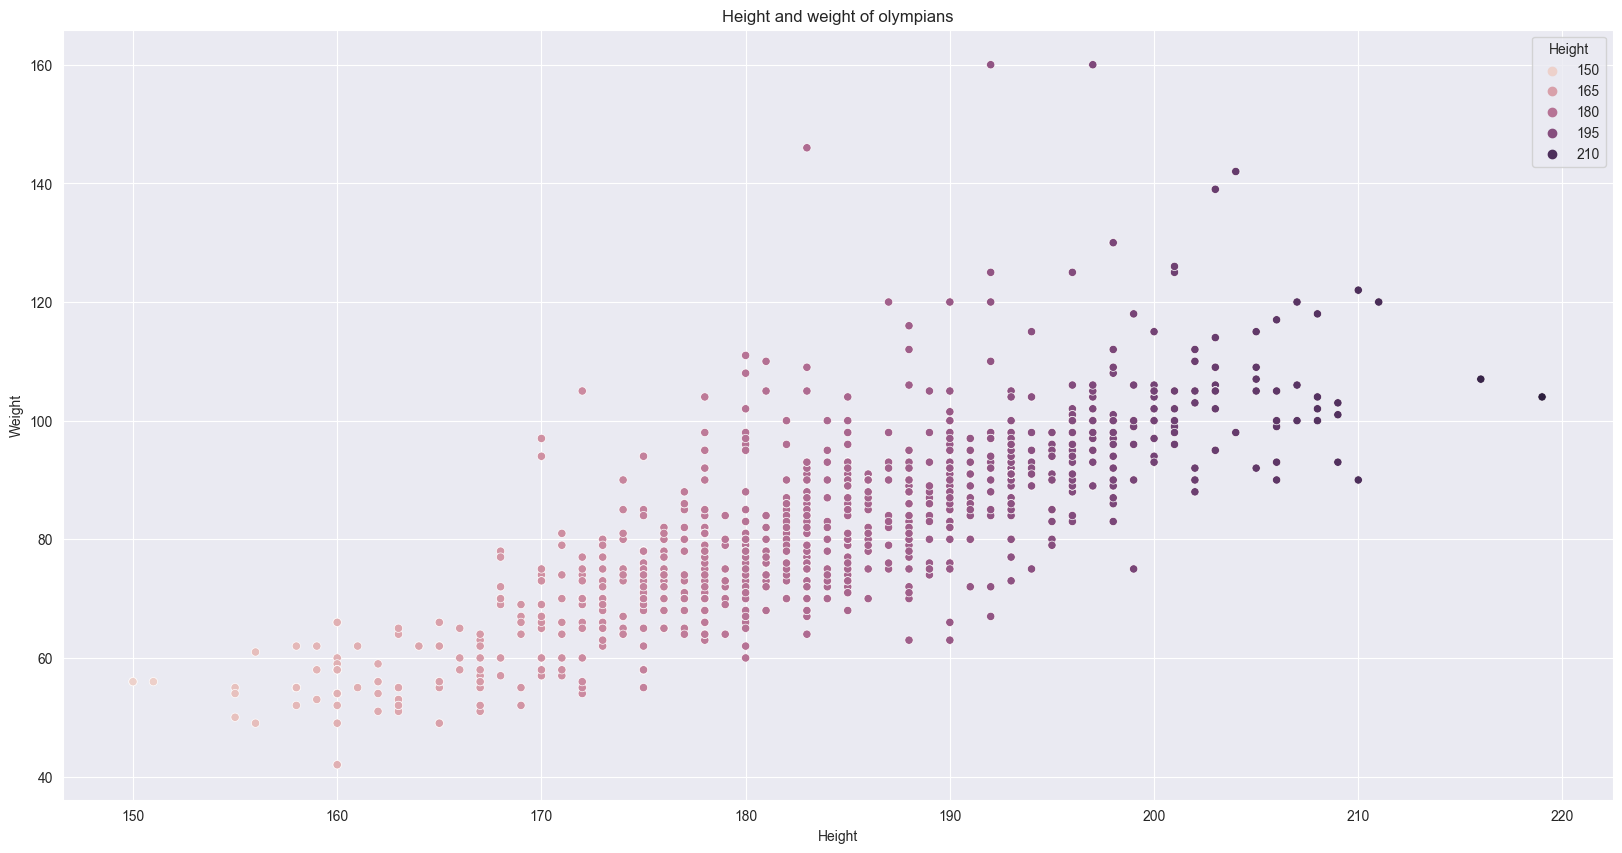

In [125]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Height', y='Weight', data=olympics_1992_le2, color='steelblue', hue='Height')
plt.title('Height and weight of olympians')
plt.show()

### Orientierung

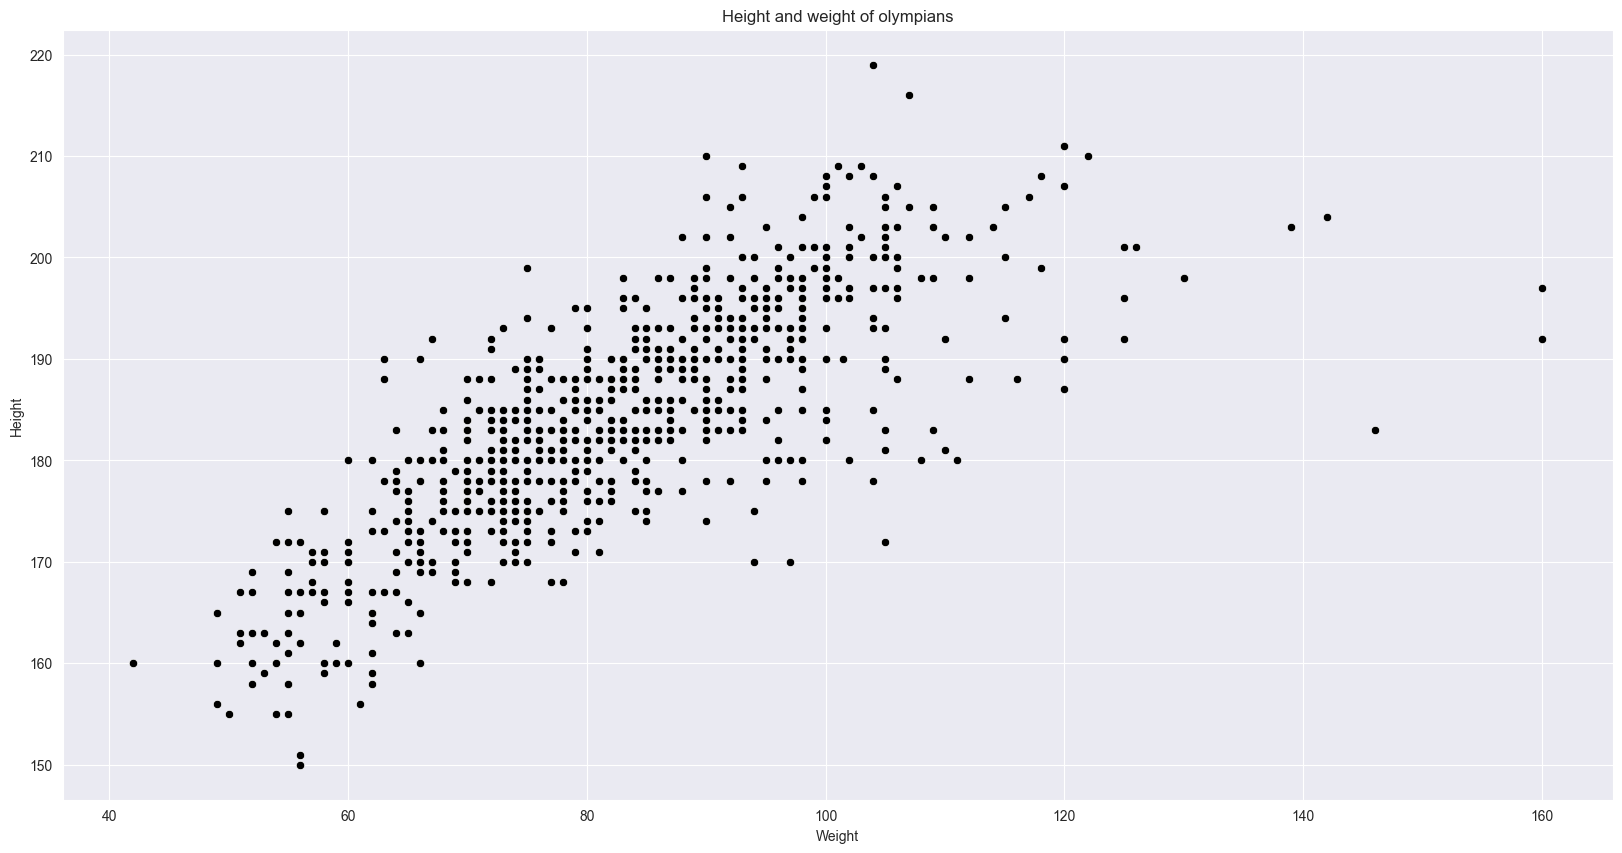

In [126]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Weight', y='Height', data=olympics_1992_le2, color = 'black')
plt.title('Height and weight of olympians')
plt.show()

### Textur

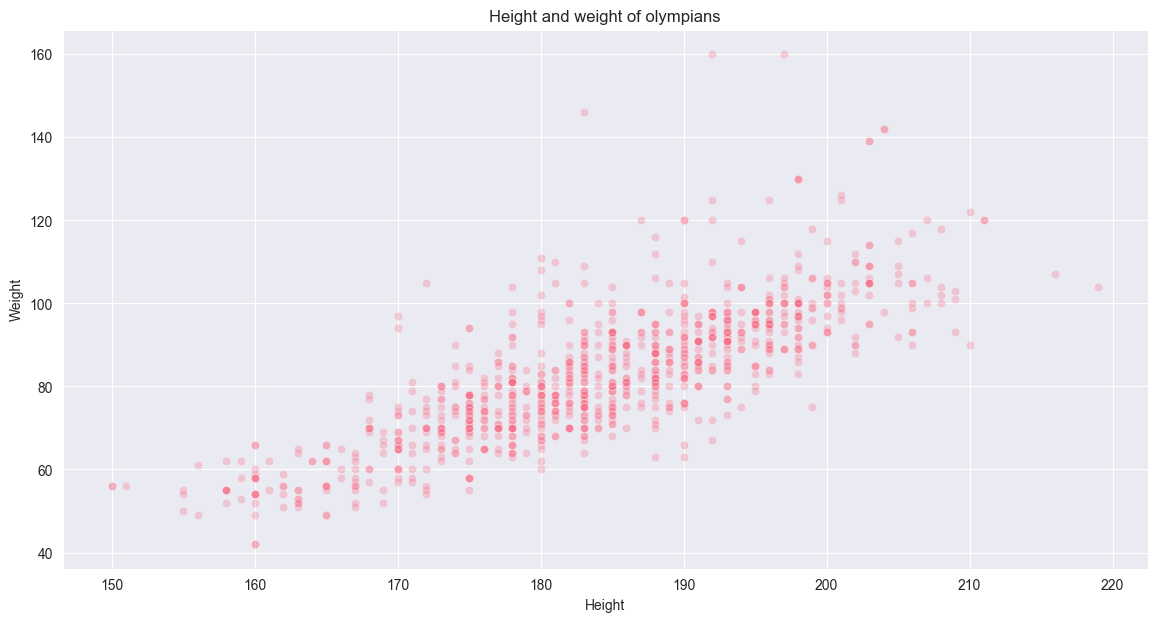

In [127]:
plt.figure(figsize=(14,7))
ax = sns.scatterplot(y='Weight', x='Height', data=olympics_1992_le2, alpha=0.3)
plt.title('Height and weight of olympians')
plt.show()

# LE3 Desing principles vs. data decisions 

In [128]:
gdv_le3 = pd.read_excel("diabetes.xlsx", sheet_name="data")
gdv_le3.head()

n_pregnant  gtt  blood_pressure  triceps_skin_fold_thickness  insulin  \
0           1   85              66                           29        0   
1           8  183              64                            0        0   
2           1   89              66                           23       94   
3           0  137              40                           35      168   
4           5  116              74                            0        0   

    bmi    dpf  age  class  
0  26.6  0.351   31      0  
1  23.3  0.672   32      1  
2  28.1  0.167   21      0  
3  43.1  2.288   33      1  
4  25.6  0.201   30      0

Enthält das Datenset fehlende Werte?

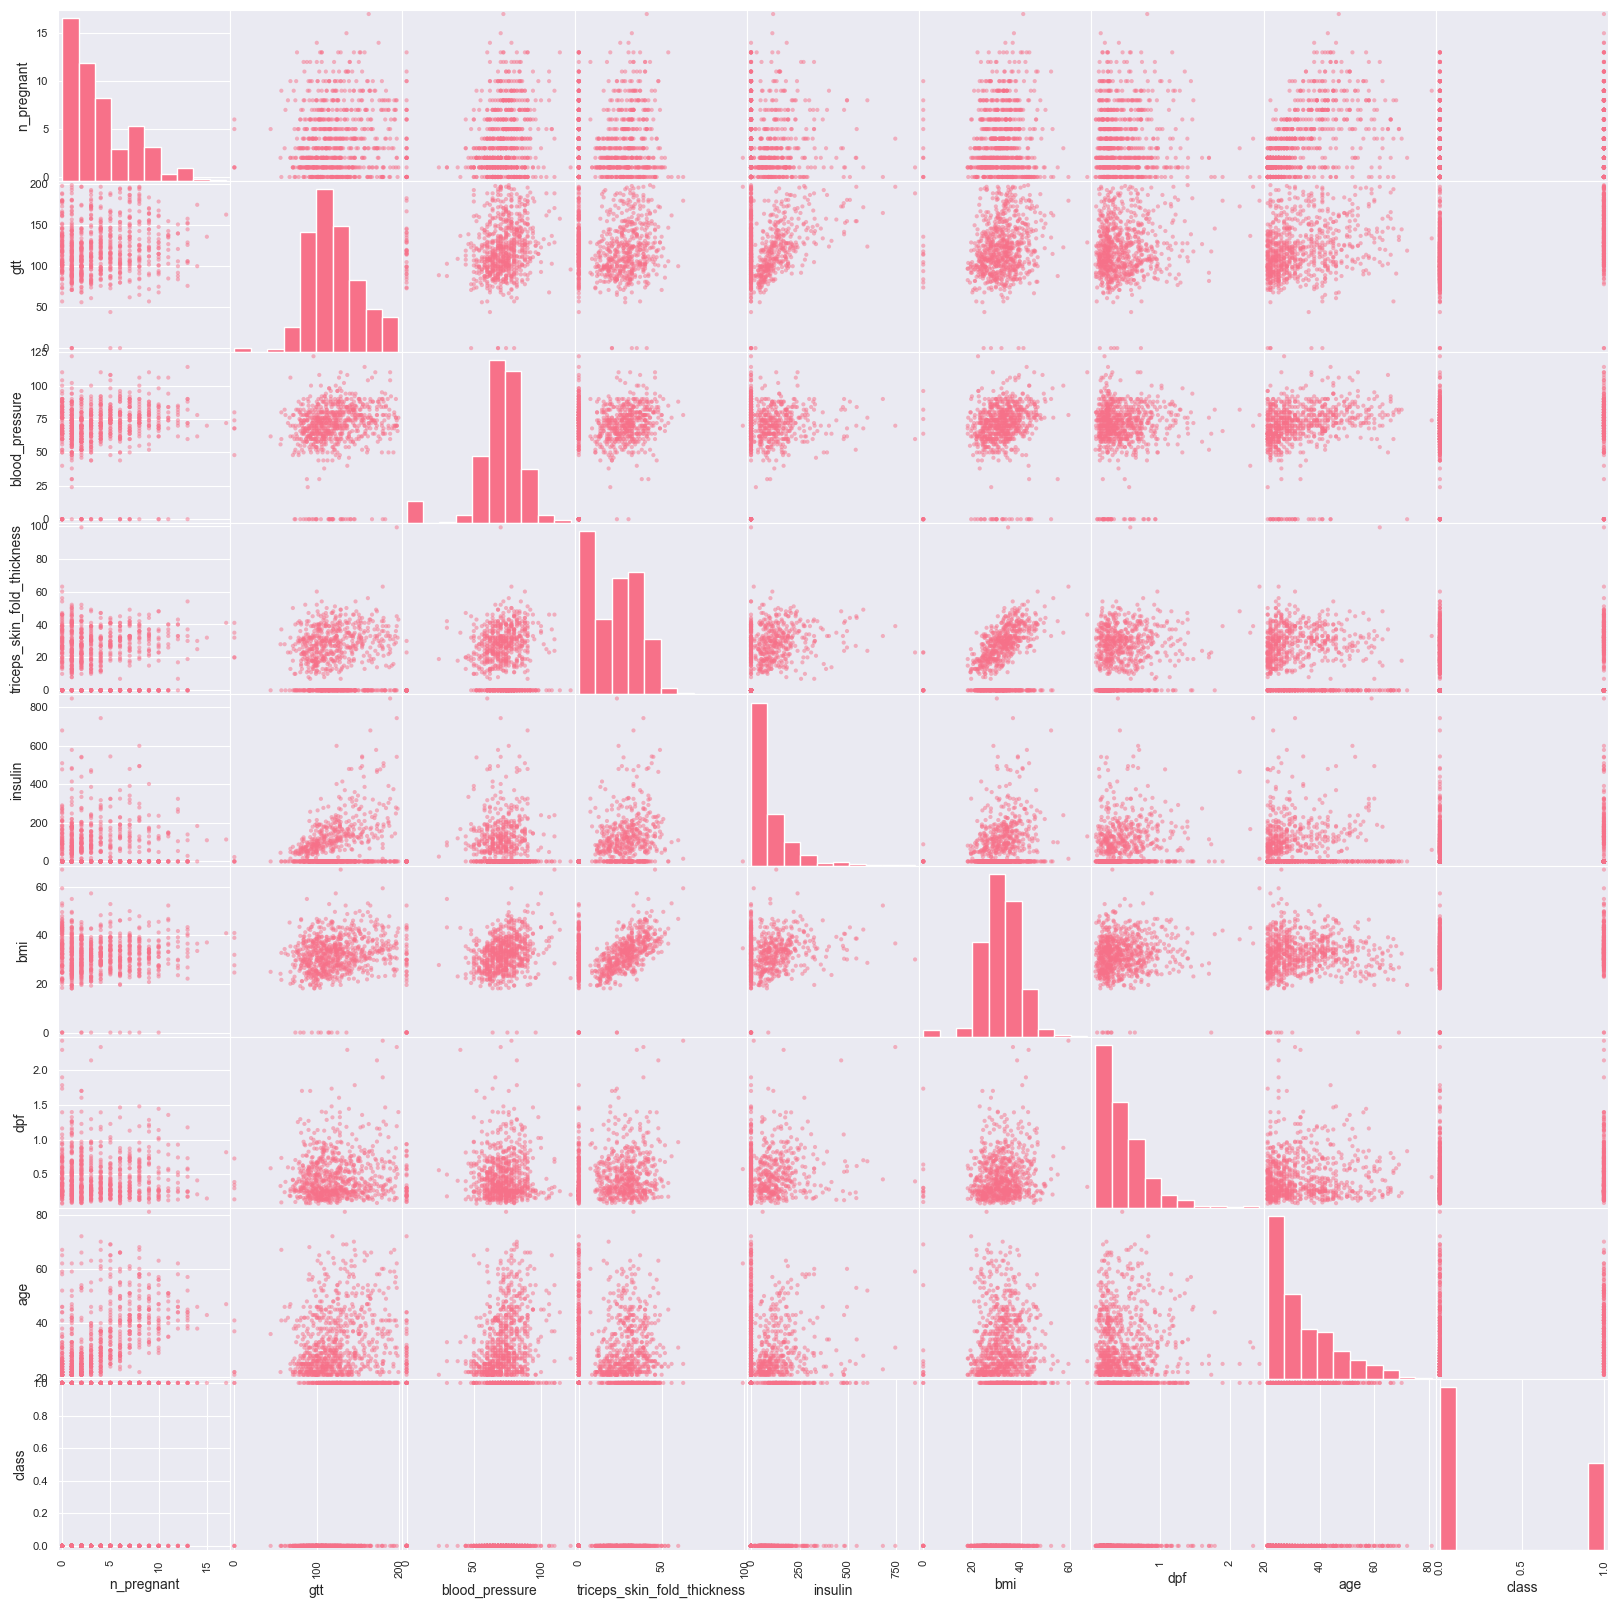

In [129]:
res = pd.plotting.scatter_matrix(gdv_le3, figsize=(20,20))

Fehlende Werte sind in gtt, blood_pressure, triceps_skin_fold_thickness und bmi mit einer Null gekennzeichnet. Im Rest haben Nullwerte eine Bedeutung und sind keine fehlenden Werte.

In [130]:
for key in ["gtt", "blood_pressure", "triceps_skin_fold_thickness", "bmi"]:
    gdv_le3[key] = gdv_le3[key].replace(0, np.nan)
    
gdv_le3.head()

n_pregnant    gtt  blood_pressure  triceps_skin_fold_thickness  insulin  \
0           1   85.0            66.0                         29.0        0   
1           8  183.0            64.0                          NaN        0   
2           1   89.0            66.0                         23.0       94   
3           0  137.0            40.0                         35.0      168   
4           5  116.0            74.0                          NaN        0   

    bmi    dpf  age  class  
0  26.6  0.351   31      0  
1  23.3  0.672   32      1  
2  28.1  0.167   21      0  
3  43.1  2.288   33      1  
4  25.6  0.201   30      0

In [131]:
gdv_le3.isna().sum()

n_pregnant                       0
gtt                              5
blood_pressure                  35
triceps_skin_fold_thickness    227
insulin                          0
bmi                             11
dpf                              0
age                              0
class                            0
dtype: int64

In [132]:
(gdv_le3.isna().mean() * 100).round(1)

n_pregnant                      0.0
gtt                             0.7
blood_pressure                  4.6
triceps_skin_fold_thickness    29.6
insulin                         0.0
bmi                             1.4
dpf                             0.0
age                             0.0
class                           0.0
dtype: float64

Man erkennt das bei der Variable triceps_skin_fold_thickness knapp 30% fehlende Werte enthält. Ich möchte das komplette Entfernen der Samples mit fehlenden Werten vermeiden und lieber eine passende Imputationsstrategie wählen, sonst würde ich sehr viele Samples verlieren. In Anbetracht der relativ geringen Anzahl von Samples möchten wir lieber darauf verzichten.

Deshalb erstelle ich ein neues Dataframe und wähle folgende Imputationsstrategien:

gtt und triceps_skin_fold_thickness: Imputation mit Median

blood_pressure und bmi: Imputation mit Durchschnitt

Danach muss ich sicherstellen, dass im neuen Data Frame keine fehlenden Werte mehr vorkommen.

In [133]:
gdv_le3_2 = gdv_le3.copy()

In [134]:
gdv_le3_2.gtt = gdv_le3_2.gtt.fillna( gdv_le3_2.gtt.median() )
gdv_le3_2.triceps_skin_fold_thickness = gdv_le3_2.triceps_skin_fold_thickness.fillna( gdv_le3_2.triceps_skin_fold_thickness.median() )
gdv_le3_2.blood_pressure = gdv_le3_2.blood_pressure.fillna( gdv_le3_2.blood_pressure.mean() )
gdv_le3_2.bmi = gdv_le3_2.bmi.fillna( gdv_le3_2.bmi.mean() )

In [135]:
gdv_le3_2

n_pregnant    gtt  blood_pressure  triceps_skin_fold_thickness  insulin  \
0             1   85.0            66.0                         29.0        0   
1             8  183.0            64.0                         29.0        0   
2             1   89.0            66.0                         23.0       94   
3             0  137.0            40.0                         35.0      168   
4             5  116.0            74.0                         29.0        0   
..          ...    ...             ...                          ...      ...   
762          10  101.0            76.0                         48.0      180   
763           2  122.0            70.0                         27.0        0   
764           5  121.0            72.0                         23.0      112   
765           1  126.0            60.0                         29.0        0   
766           1   93.0            70.0                         31.0        0   

      bmi    dpf  age  class  
0    26.6  0.351   31      0  
1    23.3  0.672   32      1  
2    28.1  0.167   21      0  
3    43.1  2.288   33      1  
4    25.6  0.201   30      0  
..    ...    ...  ...    ...  
762  32.9  0.171   63      0  
763  36.8  0.340   27      0  
764  26.2  0.245   30      0  
765  30.1  0.349   47      1  
766  30.4  0.315   23      0  

[767 rows x 9 columns]

In [136]:
gdv_le3_2.isna().any()

n_pregnant                     False
gtt                            False
blood_pressure                 False
triceps_skin_fold_thickness    False
insulin                        False
bmi                            False
dpf                            False
age                            False
class                          False
dtype: bool

In [137]:
gdv_le3_2.dtypes

n_pregnant                       int64
gtt                            float64
blood_pressure                 float64
triceps_skin_fold_thickness    float64
insulin                          int64
bmi                            float64
dpf                            float64
age                              int64
class                            int64
dtype: object

In [138]:
gdv_le3_2

n_pregnant    gtt  blood_pressure  triceps_skin_fold_thickness  insulin  \
0             1   85.0            66.0                         29.0        0   
1             8  183.0            64.0                         29.0        0   
2             1   89.0            66.0                         23.0       94   
3             0  137.0            40.0                         35.0      168   
4             5  116.0            74.0                         29.0        0   
..          ...    ...             ...                          ...      ...   
762          10  101.0            76.0                         48.0      180   
763           2  122.0            70.0                         27.0        0   
764           5  121.0            72.0                         23.0      112   
765           1  126.0            60.0                         29.0        0   
766           1   93.0            70.0                         31.0        0   

      bmi    dpf  age  class  
0    26.6  0.351   31      0  
1    23.3  0.672   32      1  
2    28.1  0.167   21      0  
3    43.1  2.288   33      1  
4    25.6  0.201   30      0  
..    ...    ...  ...    ...  
762  32.9  0.171   63      0  
763  36.8  0.340   27      0  
764  26.2  0.245   30      0  
765  30.1  0.349   47      1  
766  30.4  0.315   23      0  

[767 rows x 9 columns]

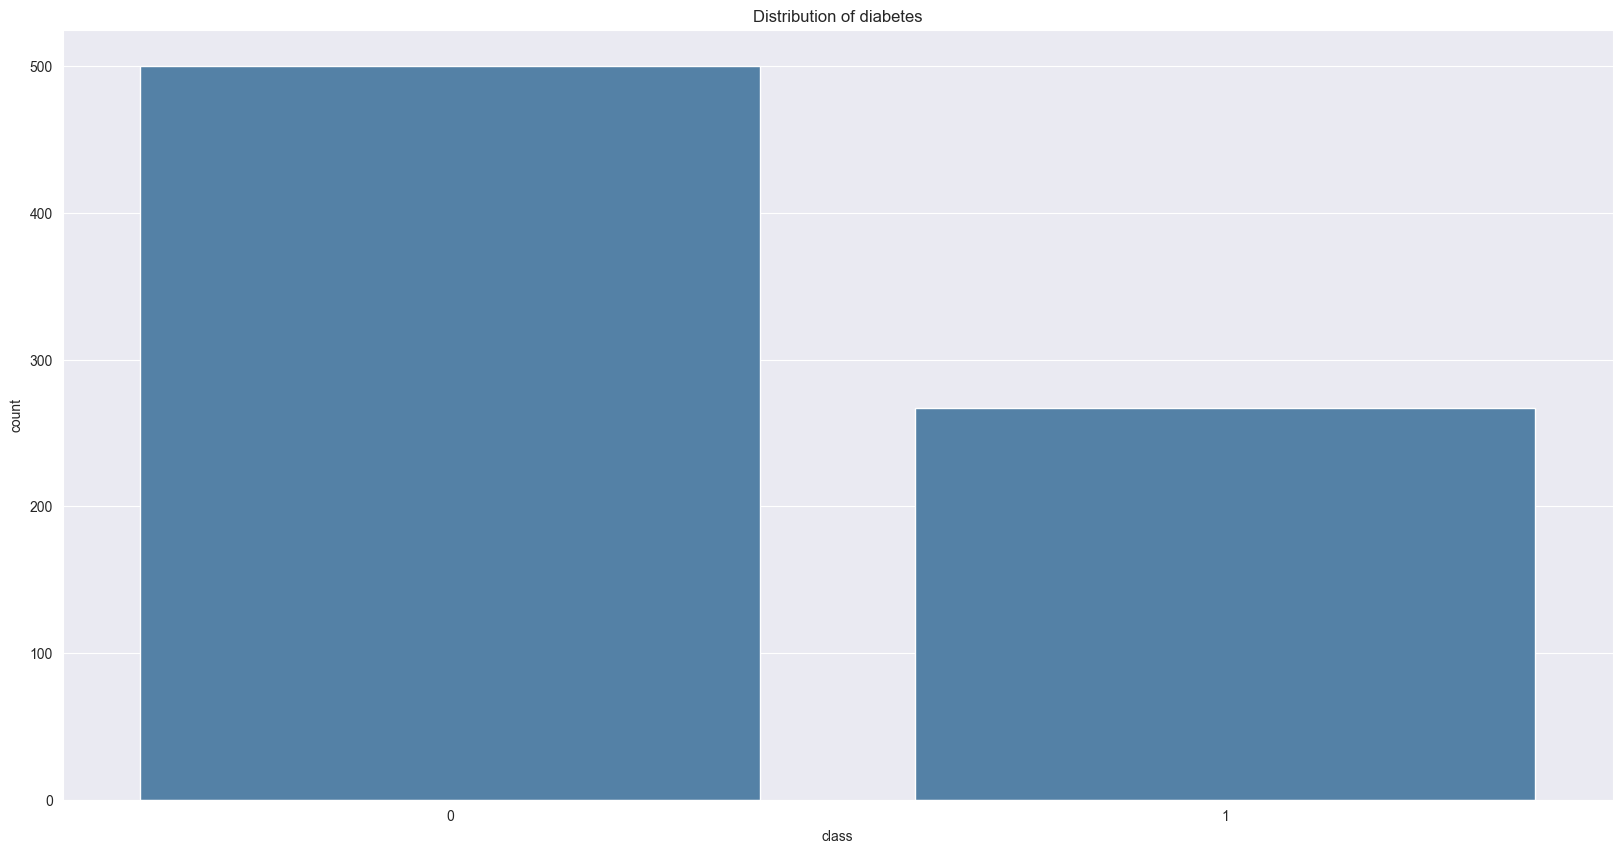

In [139]:
plt.figure(figsize=(20,10))
sns.countplot(x='class', data=gdv_le3_2, color='steelblue')
plt.title('Distribution of diabetes')
plt.show()

In [140]:
gdv_le3_2['bmi_class'] = pd.cut(gdv_le3_2['bmi'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['underweight', 'normal', 'overweight', 'obese'])
gdv_le3_2

n_pregnant    gtt  blood_pressure  triceps_skin_fold_thickness  insulin  \
0             1   85.0            66.0                         29.0        0   
1             8  183.0            64.0                         29.0        0   
2             1   89.0            66.0                         23.0       94   
3             0  137.0            40.0                         35.0      168   
4             5  116.0            74.0                         29.0        0   
..          ...    ...             ...                          ...      ...   
762          10  101.0            76.0                         48.0      180   
763           2  122.0            70.0                         27.0        0   
764           5  121.0            72.0                         23.0      112   
765           1  126.0            60.0                         29.0        0   
766           1   93.0            70.0                         31.0        0   

      bmi    dpf  age  class   bmi_class  
0    26.6  0.351   31      0  overweight  
1    23.3  0.672   32      1      normal  
2    28.1  0.167   21      0  overweight  
3    43.1  2.288   33      1       obese  
4    25.6  0.201   30      0  overweight  
..    ...    ...  ...    ...         ...  
762  32.9  0.171   63      0       obese  
763  36.8  0.340   27      0       obese  
764  26.2  0.245   30      0  overweight  
765  30.1  0.349   47      1       obese  
766  30.4  0.315   23      0       obese  

[767 rows x 10 columns]

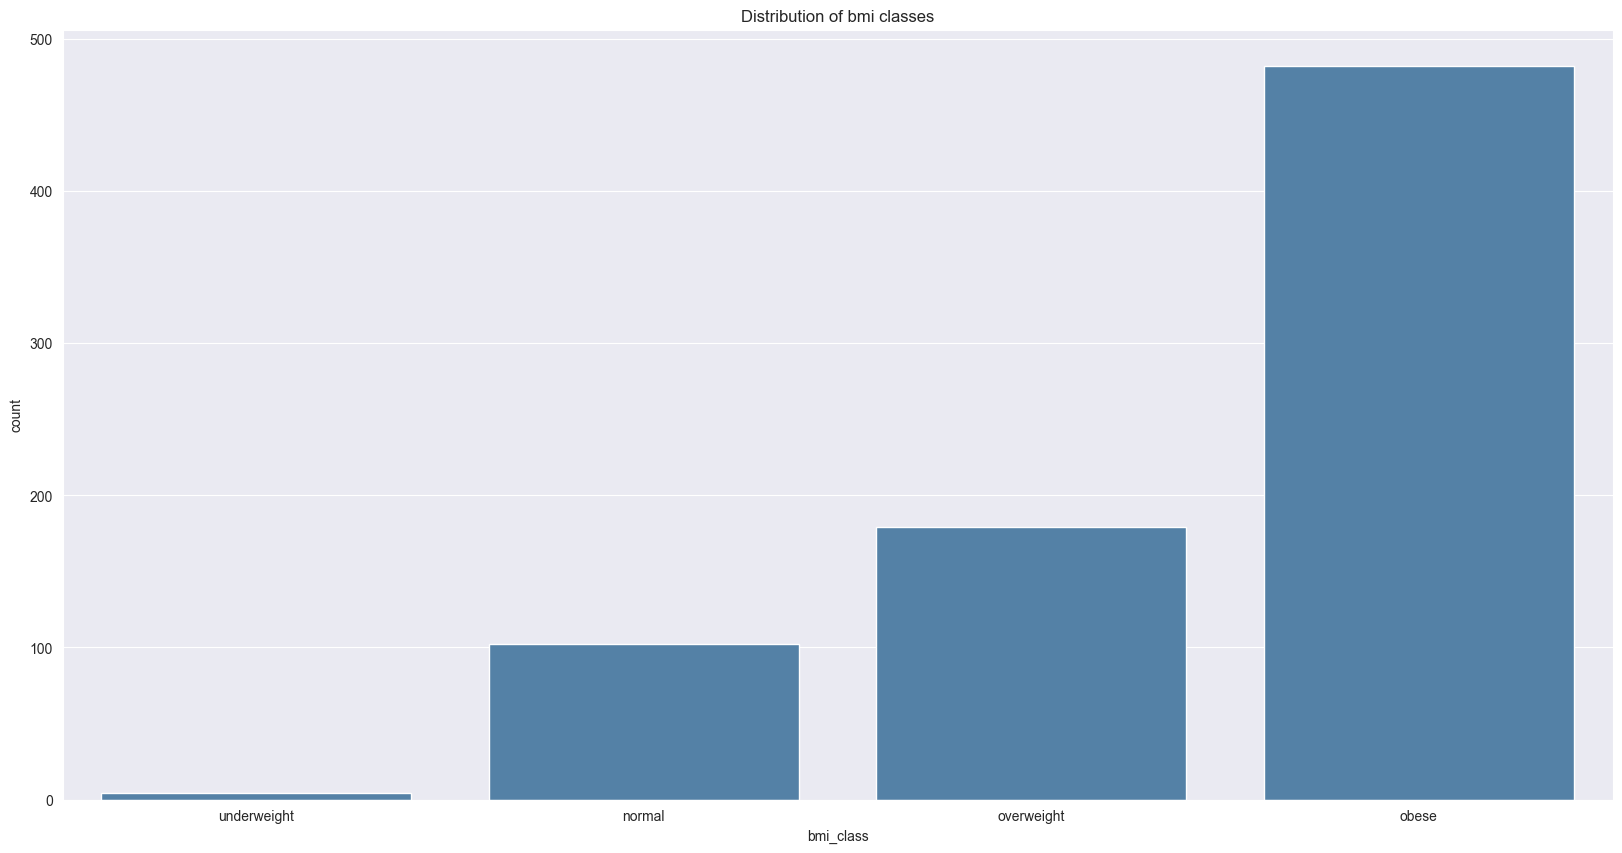

In [141]:
plt.figure(figsize=(20,10))
sns.countplot(x='bmi_class', data=gdv_le3_2, color='steelblue')
plt.title('Distribution of bmi classes')
plt.show()

In [142]:
gdv_le3_2['id'] = gdv_le3_2.index

In [143]:
gdv_le3_2

n_pregnant    gtt  blood_pressure  triceps_skin_fold_thickness  insulin  \
0             1   85.0            66.0                         29.0        0   
1             8  183.0            64.0                         29.0        0   
2             1   89.0            66.0                         23.0       94   
3             0  137.0            40.0                         35.0      168   
4             5  116.0            74.0                         29.0        0   
..          ...    ...             ...                          ...      ...   
762          10  101.0            76.0                         48.0      180   
763           2  122.0            70.0                         27.0        0   
764           5  121.0            72.0                         23.0      112   
765           1  126.0            60.0                         29.0        0   
766           1   93.0            70.0                         31.0        0   

      bmi    dpf  age  class   bmi_class   id  
0    26.6  0.351   31      0  overweight    0  
1    23.3  0.672   32      1      normal    1  
2    28.1  0.167   21      0  overweight    2  
3    43.1  2.288   33      1       obese    3  
4    25.6  0.201   30      0  overweight    4  
..    ...    ...  ...    ...         ...  ...  
762  32.9  0.171   63      0       obese  762  
763  36.8  0.340   27      0       obese  763  
764  26.2  0.245   30      0  overweight  764  
765  30.1  0.349   47      1       obese  765  
766  30.4  0.315   23      0       obese  766  

[767 rows x 11 columns]

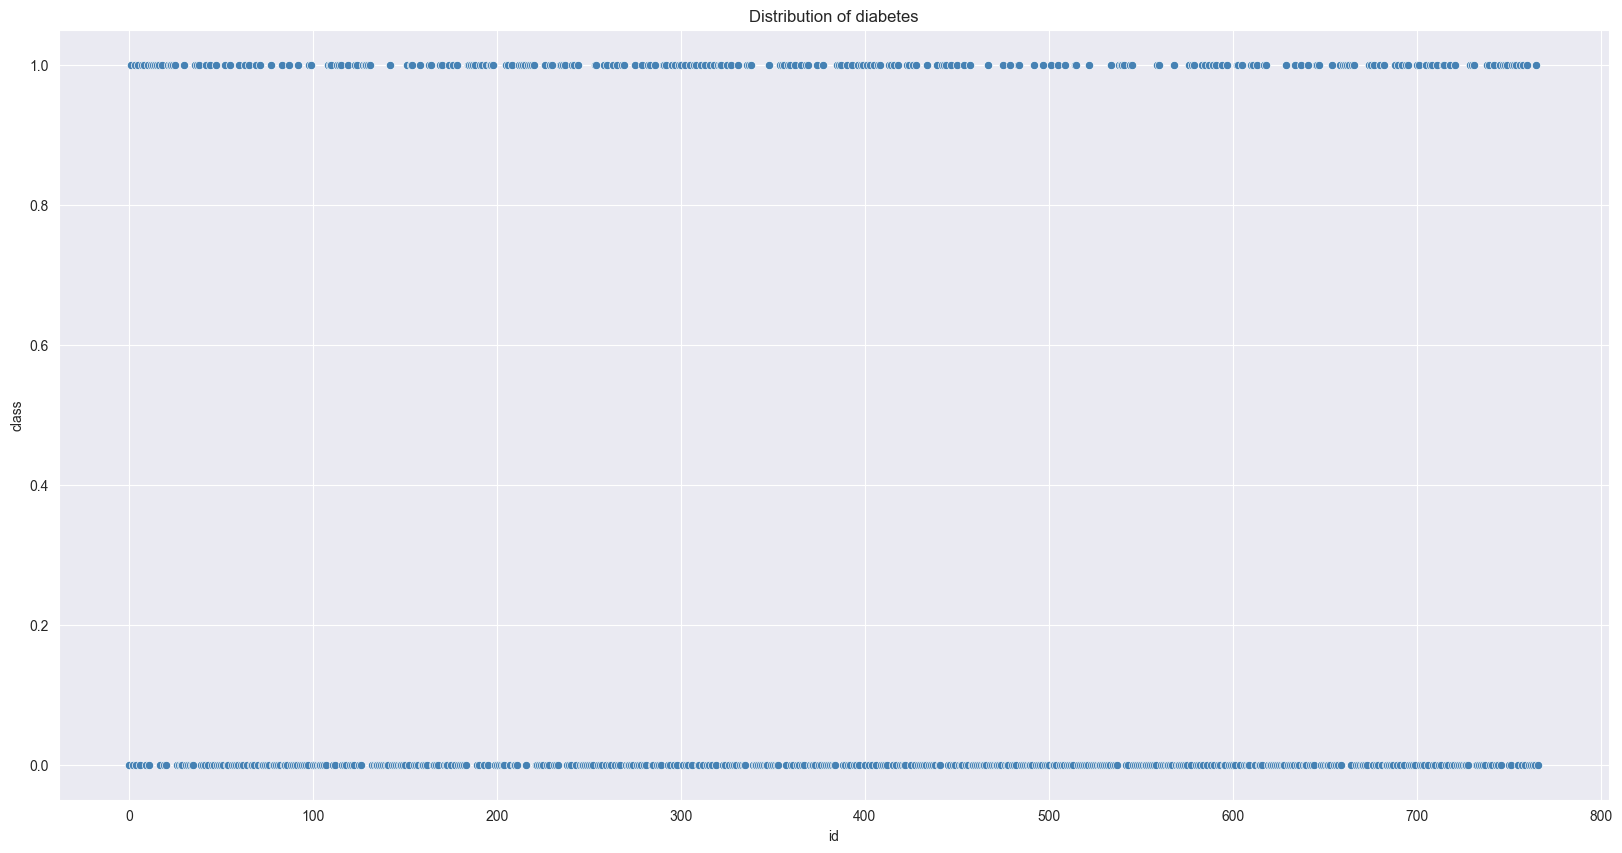

In [144]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='id', y='class', data=gdv_le3_2, color='steelblue')
plt.title('Distribution of diabetes')
plt.show()

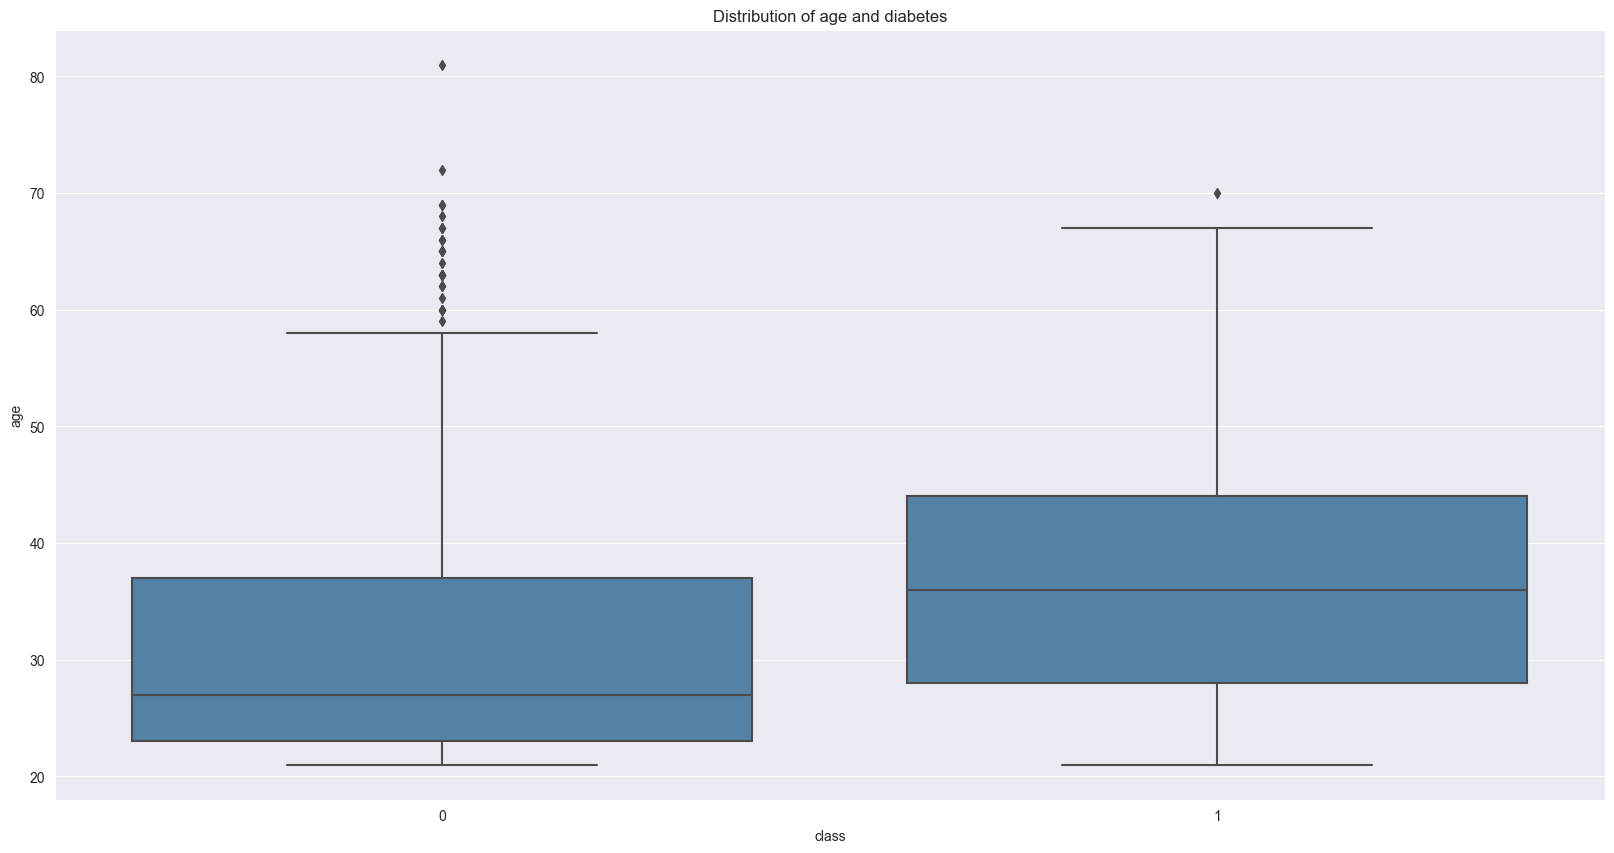

In [145]:
plt.figure(figsize=(20,10))
sns.boxplot(x='class', y='age', data=gdv_le3_2, color='steelblue')
plt.title('Distribution of age and diabetes')
plt.show()

# LE4 Grammar of Graphics

In [146]:
gdv_le4 = olympics.copy()

Aesthetics

In [147]:
gdv_le4['BMI'] = gdv_le4['Weight'] / (gdv_le4['Height'] / 100) ** 2
gdv_le4

ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1988 Winter  1988  Winter         Calgary   
...                ...  ...          ...   ...     ...             ...   
271111        Poland-1  POL  1976 Winter  1976  Winter       Innsbruck   
271112          Poland  POL  2014 Winter  2014  Winter           Sochi   
271113          Poland  POL  2014 Winter  2014  Winter           Sochi   
271114          Poland  POL  1998 Winter  1998  Winter          Nagano   
271115          Poland  POL  2002 Winter  2002  Winter  Salt Lake City   

                Sport                                     Event Medal  \
0          Basketball               Basketball Men's Basketball   NaN   
1                Judo              Judo Men's Extra-Lightweight   NaN   
2            Football                   Football Men's Football   NaN   
3          Tug-Of-War               Tug-Of-War Men's Tug-Of-War  Gold   
4       Speed Skating          Speed Skating Women's 500 metres   NaN   
...               ...                                       ...   ...   
271111           Luge                Luge Mixed (Men)'s Doubles   NaN   
271112    Ski Jumping  Ski Jumping Men's Large Hill, Individual   NaN   
271113    Ski Jumping        Ski Jumping Men's Large Hill, Team   NaN   
271114      Bobsleigh                      Bobsleigh Men's Four   NaN   
271115      Bobsleigh                      Bobsleigh Men's Four   NaN   

              BMI  
0       24.691358  
1       20.761246  
2             NaN  
3             NaN  
4       23.959094  
...           ...  
271111  27.776911  
271112  19.047004  
271113  19.047004  
271114  28.049671  
271115  28.049671  

[271116 rows x 16 columns]

In [148]:
# only year 2002 - 2008
gdv_le4 = gdv_le4[gdv_le4['Year'] >= 2002]
gdv_le4 = gdv_le4[gdv_le4['Year'] <= 2008]
gdv_le4

ID                          Name Sex   Age  Height  Weight  \
28           9              Antti Sami Aalto   M  26.0   186.0    96.0   
72          20            Kjetil Andr Aamodt   M  30.0   176.0    85.0   
73          20            Kjetil Andr Aamodt   M  30.0   176.0    85.0   
74          20            Kjetil Andr Aamodt   M  30.0   176.0    85.0   
75          20            Kjetil Andr Aamodt   M  30.0   176.0    85.0   
...        ...                           ...  ..   ...     ...     ...   
271103  135563     Olesya Nikolayevna Zykina   F  23.0   171.0    64.0   
271104  135564  Yevgeny Aleksandrovich Zykov   M  22.0   172.0    65.0   
271106  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
271109  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
271115  135571            Tomasz Ireneusz ya   M  34.0   185.0    96.0   

             Team  NOC        Games  Year  Season            City  \
28        Finland  FIN  2002 Winter  2002  Winter  Salt Lake City   
72         Norway  NOR  2002 Winter  2002  Winter  Salt Lake City   
73         Norway  NOR  2002 Winter  2002  Winter  Salt Lake City   
74         Norway  NOR  2002 Winter  2002  Winter  Salt Lake City   
75         Norway  NOR  2002 Winter  2002  Winter  Salt Lake City   
...           ...  ...          ...   ...     ...             ...   
271103     Russia  RUS  2004 Summer  2004  Summer          Athina   
271104   Russia-1  RUS  2002 Winter  2002  Winter  Salt Lake City   
271106  Argentina  ARG  2004 Summer  2004  Summer          Athina   
271109     Russia  RUS  2004 Summer  2004  Summer          Athina   
271115     Poland  POL  2002 Winter  2002  Winter  Salt Lake City   

                Sport                                   Event   Medal  \
28         Ice Hockey             Ice Hockey Men's Ice Hockey     NaN   
72      Alpine Skiing            Alpine Skiing Men's Downhill     NaN   
73      Alpine Skiing             Alpine Skiing Men's Super G    Gold   
74      Alpine Skiing        Alpine Skiing Men's Giant Slalom     NaN   
75      Alpine Skiing              Alpine Skiing Men's Slalom     NaN   
...               ...                                     ...     ...   
271103      Athletics  Athletics Women's 4 x 400 metres Relay  Silver   
271104           Luge              Luge Mixed (Men)'s Doubles     NaN   
271106         Hockey                     Hockey Men's Hockey     NaN   
271109         Rowing  Rowing Men's Lightweight Coxless Fours     NaN   
271115      Bobsleigh                    Bobsleigh Men's Four     NaN   

              BMI  
28      27.748873  
72      27.440599  
73      27.440599  
74      27.440599  
75      27.440599  
...           ...  
271103  21.887076  
271104  21.971336  
271106  26.927438  
271109  21.499597  
271115  28.049671  

[35536 rows x 16 columns]

In [149]:
gdv_le4_m = gdv_le4[gdv_le4['Sex'] == 'M']

gdv_le4_m = gdv_le4_m.groupby('Year').mean()
gdv_le4_m

ID        Age      Height     Weight        BMI
Year                                                           
2002  67926.848437  26.409181  179.715706  78.024741  24.084091
2004  67838.267063  26.242497  180.891246  78.372140  23.810993
2006  68156.080762  26.473524  179.845361  77.349024  23.840272
2008  68108.147958  26.375161  181.253646  78.659909  23.803349

In [150]:
gdv_le4_w = gdv_le4[gdv_le4['Sex'] == 'F']

gdv_le4_w = gdv_le4_w.groupby('Year').mean()
gdv_le4_w

ID        Age      Height     Weight        BMI
Year                                                           
2002  73740.262958  25.128951  166.646006  60.200835  21.627436
2004  71003.162820  24.780923  168.979949  61.205670  21.301711
2006  71573.132043  25.190666  166.838930  60.339133  21.633085
2008  70115.009285  24.875645  169.500433  61.675539  21.358938

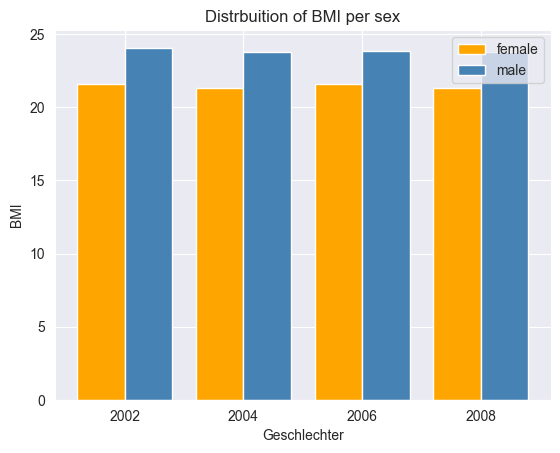

In [151]:
X = ['2002','2004','2006','2008']
w = [21.627436,21.301711,21.633085,21.358938]
m = [24.084091,23.810993,23.840272,23.803349]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, w, 0.4, label = 'female', color = 'orange')
plt.bar(X_axis + 0.2, m, 0.4, label = 'male', color = 'steelblue')

plt.xticks(X_axis, X)
plt.xlabel("Geschlechter")
plt.ylabel("BMI")
plt.title("Distrbuition of BMI per sex")
plt.legend()
plt.show()


Scale

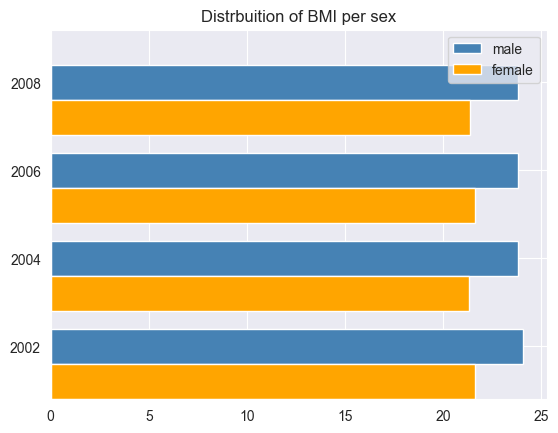

In [152]:
df = pd.DataFrame(dict(graph=['2002','2004','2006','2008'],
                           w = [21.627436,21.301711,21.633085,21.358938], m = [24.084091,23.810993,23.840272,23.803349])) 

ind = np.arange(len(df))
width = 0.4

fig, ax = plt.subplots()
ax.barh(ind + width, df.m, width, color='steelblue', label='male')
ax.barh(ind, df.w, width, color='orange', label='female')

ax.set(yticks=ind + width, yticklabels=df.graph, ylim=[2*width - 1, len(df)])
ax.legend()

plt.title('Distrbuition of BMI per sex')

plt.show()


Geometric objects

In [153]:
gdv_le4_norway = gdv_le4[(gdv_le4['Team'] == 'Norway') & (gdv_le4['Medal'].isin(['Gold', 'Silver', 'Bronze']))]
gdv_le4_norway

ID                       Name Sex   Age  Height  Weight    Team  \
73          20         Kjetil Andr Aamodt   M  30.0   176.0    85.0  Norway   
76          20         Kjetil Andr Aamodt   M  30.0   176.0    85.0  Norway   
78          20         Kjetil Andr Aamodt   M  34.0   176.0    85.0  Norway   
79          21  Ragnhild Margrethe Aamodt   F  27.0   163.0     NaN  Norway   
5430      3069  Thomas Alsgaard (Alsgrd-)   M  30.0   190.0    82.0  Norway   
...        ...                        ...  ..   ...     ...     ...     ...   
243830  122115                 Pl Trulsen   M  39.0   189.0   100.0  Norway   
244734  122530            Olaf Karl Tufte   M  28.0   193.0    94.0  Norway   
244735  122530            Olaf Karl Tufte   M  32.0   193.0    94.0  Norway   
245588  122981       Kjersti Tysse-Pltzer   F  36.0   173.0    55.0  Norway   
247197  123759         Lars Magnus Vgberg   M  34.0   185.0    85.0  Norway   

        NOC        Games  Year  Season            City                 Sport  \
73      NOR  2002 Winter  2002  Winter  Salt Lake City         Alpine Skiing   
76      NOR  2002 Winter  2002  Winter  Salt Lake City         Alpine Skiing   
78      NOR  2006 Winter  2006  Winter          Torino         Alpine Skiing   
79      NOR  2008 Summer  2008  Summer         Beijing              Handball   
5430    NOR  2002 Winter  2002  Winter  Salt Lake City  Cross Country Skiing   
...     ...          ...   ...     ...             ...                   ...   
243830  NOR  2002 Winter  2002  Winter  Salt Lake City               Curling   
244734  NOR  2004 Summer  2004  Summer          Athina                Rowing   
244735  NOR  2008 Summer  2008  Summer         Beijing                Rowing   
245588  NOR  2008 Summer  2008  Summer         Beijing             Athletics   
247197  NOR  2002 Winter  2002  Winter  Salt Lake City               Curling   

                                                    Event   Medal        BMI  
73                            Alpine Skiing Men's Super G    Gold  27.440599  
76                           Alpine Skiing Men's Combined    Gold  27.440599  
78                            Alpine Skiing Men's Super G    Gold  27.440599  
79                              Handball Women's Handball    Gold        NaN  
5430    Cross Country Skiing Men's 10/10 kilometres Pu...    Gold  22.714681  
...                                                   ...     ...        ...  
243830                              Curling Men's Curling    Gold  27.994737  
244734                         Rowing Men's Single Sculls    Gold  25.235577  
244735                         Rowing Men's Single Sculls    Gold  25.235577  
245588               Athletics Women's 20 kilometres Walk  Silver  18.376825  
247197                              Curling Men's Curling    Gold  24.835646  

[93 rows x 16 columns]

In [154]:
gdv_le4_norway_m = gdv_le4_norway[(gdv_le4_norway['Sex'] == 'M')]
gdv_le4_norway_m

ID                         Name Sex   Age  Height  Weight    Team  \
73          20           Kjetil Andr Aamodt   M  30.0   176.0    85.0  Norway   
76          20           Kjetil Andr Aamodt   M  30.0   176.0    85.0  Norway   
78          20           Kjetil Andr Aamodt   M  34.0   176.0    85.0  Norway   
5430      3069    Thomas Alsgaard (Alsgrd-)   M  30.0   190.0    82.0  Norway   
5431      3069    Thomas Alsgaard (Alsgrd-)   M  30.0   190.0    82.0  Norway   
7367      4124               Frode Andresen   M  28.0   191.0    76.0  Norway   
7368      4124               Frode Andresen   M  32.0   191.0    76.0  Norway   
10946     5980               Anders Aukland   M  29.0   181.0    72.0  Norway   
22704    11951          Ole Einar Bjrndalen   M  28.0   178.0    65.0  Norway   
22705    11951          Ole Einar Bjrndalen   M  28.0   178.0    65.0  Norway   
22706    11951          Ole Einar Bjrndalen   M  28.0   178.0    65.0  Norway   
22707    11951          Ole Einar Bjrndalen   M  28.0   178.0    65.0  Norway   
22710    11951          Ole Einar Bjrndalen   M  32.0   178.0    65.0  Norway   
22711    11951          Ole Einar Bjrndalen   M  32.0   178.0    65.0  Norway   
22712    11951          Ole Einar Bjrndalen   M  32.0   178.0    65.0  Norway   
29957    15459                 Tore Brovold   M  38.0   175.0     NaN  Norway   
33220    17109                   Lars Bystl   M  27.0   179.0    60.0  Norway   
33221    17109                   Lars Bystl   M  27.0   179.0    60.0  Norway   
33222    17109                   Lars Bystl   M  27.0   179.0    60.0  Norway   
49569    25537            Flemming Davanger   M  38.0   183.0    68.0  Norway   
65094    33312                  Frode Estil   M  29.0   188.0    82.0  Norway   
65096    33312                  Frode Estil   M  29.0   188.0    82.0  Norway   
65097    33312                  Frode Estil   M  29.0   188.0    82.0  Norway   
65100    33312                  Frode Estil   M  33.0   188.0    82.0  Norway   
70043    35677          Nils Olav Fjeldheim   M  27.0   178.0    80.0  Norway   
80090    40650                Egil Gjelland   M  28.0   186.0    80.0  Norway   
89926    45571             Halvard Hanevold   M  32.0   181.0    75.0  Norway   
89927    45571             Halvard Hanevold   M  36.0   181.0    75.0  Norway   
89930    45571             Halvard Hanevold   M  36.0   181.0    75.0  Norway   
95373    48293             Tor-Arne Hetland   M  28.0   186.0    79.0  Norway   
95377    48293             Tor-Arne Hetland   M  32.0   186.0    79.0  Norway   
96537    48877           Odd-Bjrn Hjelmeset   M  30.0   180.0    69.0  Norway   
103015   52119    Tommy Wiggen Ingebrigtsen   M  28.0   178.0    61.0  Norway   
120540   61001  Lasse Kjus (Kristoffersen-)   M  31.0   180.0    88.0  Norway   
120542   61001  Lasse Kjus (Kristoffersen-)   M  31.0   180.0    88.0  Norway   
132692   66784            Eirik Vers Larsen   M  28.0   182.0    80.0  Norway   
132693   66784            Eirik Vers Larsen   M  28.0   182.0    80.0  Norway   
132695   66784            Eirik Vers Larsen   M  32.0   182.0    80.0  Norway   
141061   70795                 Roar Ljkelsy   M  29.0   177.0    56.0  Norway   
141063   70795                 Roar Ljkelsy   M  29.0   177.0    56.0  Norway   
160859   80725           Magnus Hovdal Moan   M  22.0   189.0    74.0  Norway   
160860   80725           Magnus Hovdal Moan   M  22.0   189.0    74.0  Norway   
169746   85328                Torger Nergrd   M  27.0   179.0    85.0  Norway   
175245   88068           Alexander Dale Oen   M  23.0   190.0    80.0  Norway   
196752   98778          Bent nund Ramsfjell   M  34.0   179.0    78.0  Norway   
203916  102372            Bjrn Einar Romren   M  24.0   183.0    64.0  Norway   
211957  106415                   Lasse Stre   M  27.0   182.0    85.0  Norway   
222269  111678             Kristen Skjeldal   M  34.0   175.0    70.0  Norway   
222271  111678             Kristen Skjeldal

In [155]:
gdv_le4_norway_w = gdv_le4_norway[(gdv_le4_norway['Sex'] == 'F')]
gdv_le4_norway_w

ID                                        Name Sex   Age  Height  \
79          21                   Ragnhild Margrethe Aamodt   F  27.0   163.0   
7304      4085                  Gunn Margit Aas Andreassen   F  28.0   177.0   
22668    11943                                Marit Bjrgen   F  21.0   168.0   
22670    11943                                Marit Bjrgen   F  25.0   168.0   
28763    14899           Karoline Charlotte Dyhre Breivang   F  28.0   172.0   
30997    15961                         Kjersti stgrd Buaas   F  24.0   161.0   
48243    24864                       Gunn Rita Dahle-Flesj   F  31.0   173.0   
71912    36595                         Marit Malm Frafjord   F  22.0   182.0   
84704    42984                          Kari Aalvik Grimsb   F  23.0   180.0   
89488    45343           Gro Hammerseng (-Hammerseng-Edin)   F  28.0   180.0   
90658    45928                     Katrine Lunde Haraldsen   F  28.0   181.0   
109019   55122                         Kari Mette Johansen   F  29.0   172.0   
132803   66847                                Tonje Larsen   F  33.0   184.0   
144050   72292                    Kristine Lunde-Borgersen   F  28.0   181.0   
161078   80827            Anita Moen-Guidon (-Moen Bonden)   F  34.0   167.0   
161081   80827            Anita Moen-Guidon (-Moen Bonden)   F  34.0   167.0   
172876   86875               Sara Maria Evelina Nordenstam   F  25.0   169.0   
173706   87263                               Tonje Nstvold   F  23.0   178.0   
174138   87485                  Katja Johanna Alice Nyberg   F  28.0   182.0   
184336   92638                Hilde Gjermundshaug Pedersen   F  37.0   167.0   
184338   92638                Hilde Gjermundshaug Pedersen   F  41.0   167.0   
200545  100714  Linn-Kristin Ullevoldster Riegelhuth Koren   F  24.0   175.0   
222065  111599                       Bente Skari-Martinsen   F  29.0   173.0   
222066  111599                       Bente Skari-Martinsen   F  29.0   173.0   
222068  111599                       Bente Skari-Martinsen   F  29.0   173.0   
222252  111676                         Ann Elen Skjelbreid   F  30.0   171.0   
222258  111677                  Liv Grete Skjelbreid-Poire   F  27.0   167.0   
222259  111677                  Liv Grete Skjelbreid-Poire   F  27.0   167.0   
224136  112580                            Gril Snorroeggen   F  23.0   177.0   
224779  112907                                Nina Solheim   F  29.0   170.0   
226076  113612                    Else-Marthe Srlie Lybekk   F  29.0   177.0   
232305  116540                                Siren Sundby   F  21.0   165.0   
240633  120580                     Linda Tjrhom (-Grubben)   F  22.0   178.0   
242789  121592                                   Kari Traa   F  28.0   168.0   
242790  121592                                   Kari Traa   F  32.0   168.0   
245588  122981                        Kjersti Tysse-Pltzer   F  36.0   173.0   

        Weight    Team  NOC        Games  Year  Season            City  \
79         NaN  Norway  NOR  2008 Summer  2008  Summer         Beijing   
7304      60.0  Norway  NOR  2002 Winter  2002  Winter  Salt Lake City   
22668     64.0  Norway  NOR  2002 Winter  2002  Winter  Salt Lake City   
22670     64.0  Norway  NOR  2006 Winter  2006  Winter          Torino   
28763      NaN  Norway  NOR  2008 Summer  2008  Summer         Beijing   
30997     57.0  Norway  NOR  2006 Winter  2006  Winter          Torino   
48243     64.0  Norway  NOR  2004 Summer  2004  Summer          Athina   
71912     78.0  Norway  NOR  2008 Summer  2008  Summer         Beijing   
84704     80.0  Norway  NOR  2008 Summer  2008  Summer         Beijing   
89488     68.0  Norway  NOR  2008 Summer  2008  Summer         Beijing   
90658      NaN  Norway  NOR  2008 Summer  2008  Summer         Beijing   
109019     NaN  Norway  NOR  2008 Summer  2008  Summer         Beijing   
132803    72.0  Norway  NOR  2008 Summer  2008  Summer         Beijing   
144050    67.0 

In [156]:
gdv_le4_norway_m = gdv_le4_norway_m.groupby('Year').count()
gdv_le4_norway_m

ID  Name  Sex  Age  Height  Weight  Team  NOC  Games  Season  City  \
Year                                                                       
2002  28    28   28   28      28      28    28   28     28      28    28   
2004   5     5    5    5       5       5     5    5      5       5     5   
2006  19    19   19   19      19      19    19   19     19      19    19   
2008   5     5    5    5       5       4     5    5      5       5     5   

      Sport  Event  Medal  BMI  
Year                            
2002     28     28     28   28  
2004      5      5      5    5  
2006     19     19     19   19  
2008      5      5      5    4

In [157]:
gdv_le4_norway_w = gdv_le4_norway_w.groupby('Year').count()
gdv_le4_norway_w

ID  Name  Sex  Age  Height  Weight  Team  NOC  Games  Season  City  \
Year                                                                       
2002  13    13   13   13      13      13    13   13     13      13    13   
2004   2     2    2    2       2       2     2    2      2       2     2   
2006   4     4    4    4       4       4     4    4      4       4     4   
2008  17    17   17   17      17      11    17   17     17      17    17   

      Sport  Event  Medal  BMI  
Year                            
2002     13     13     13   13  
2004      2      2      2    2  
2006      4      4      4    4  
2008     17     17     17   11

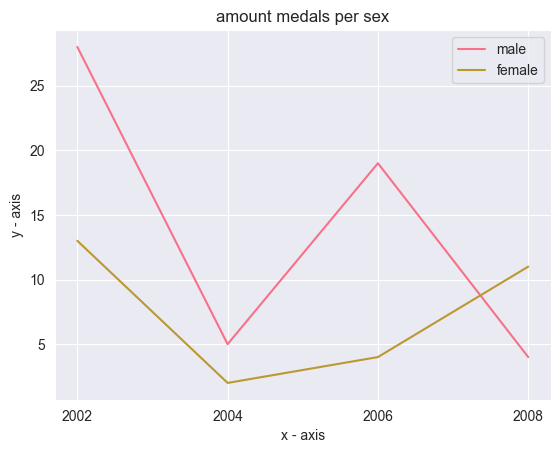

In [158]:
x1 = ['2002','2004','2006','2008']
y1 = [28,5,19,4]
plt.plot(x1, y1, label = "male")
x2 = ['2002','2004','2006','2008']
y2 = [13,2,4,11]
plt.plot(x2, y2, label = "female")
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('amount medals per sex')
plt.legend()
plt.show()


Statistics

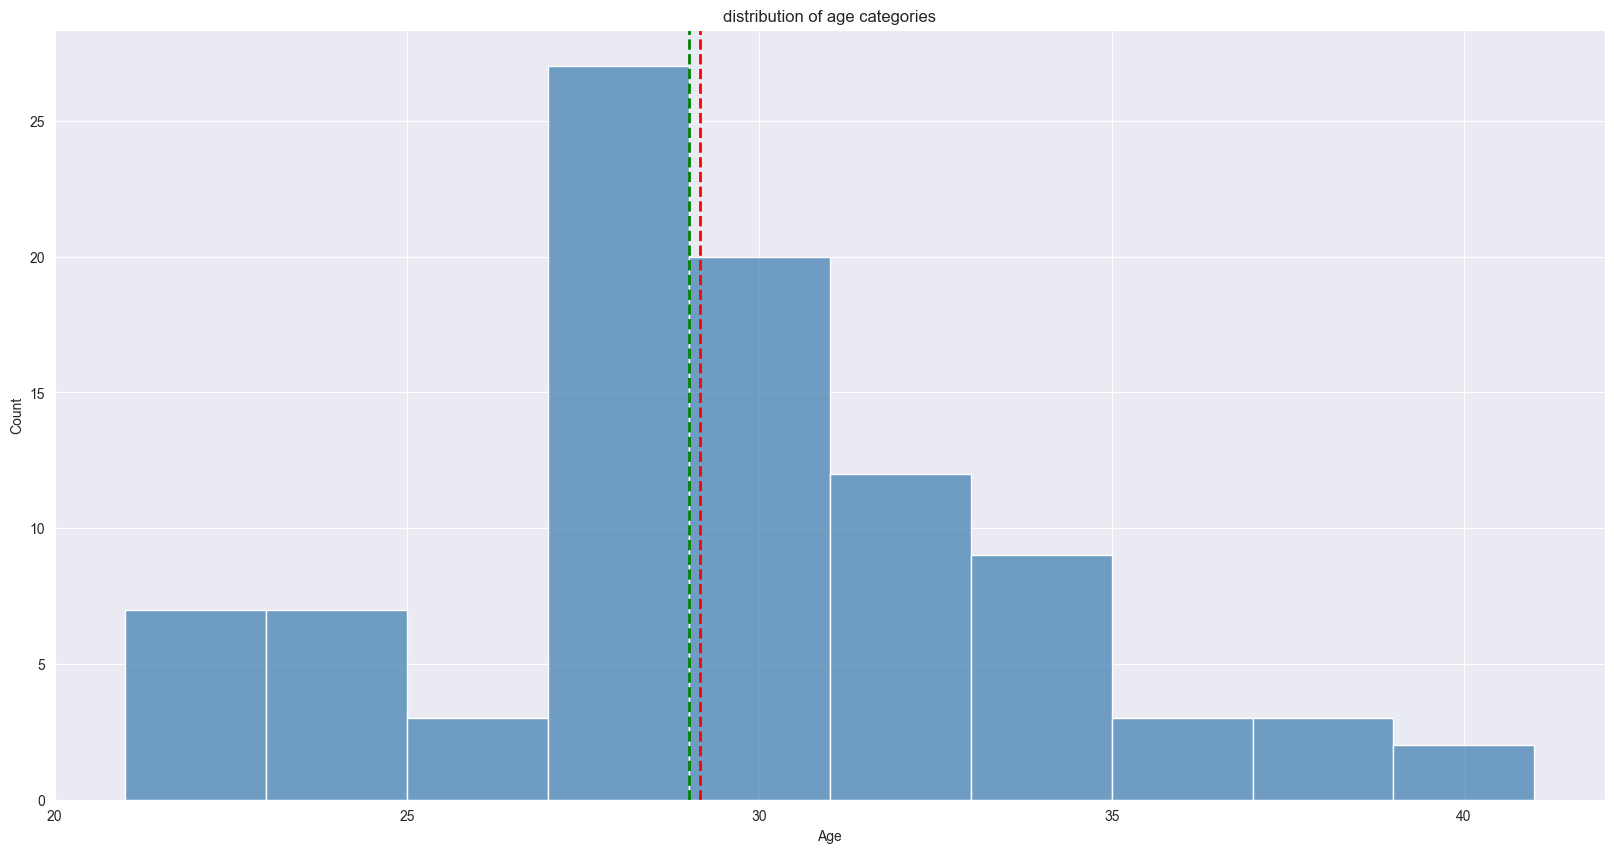

In [159]:
plt.figure(figsize=(20,10))
sns.histplot(gdv_le4_norway['Age'], color='steelblue')
plt.axvline(gdv_le4_norway['Age'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(gdv_le4_norway['Age'].median(), color='green', linestyle='dashed', linewidth=2)
plt.xticks(np.arange(20, 45, 5))
plt.title('distribution of age categories')
plt.show()

In [160]:
print(gdv_le4_norway['Age'].mean())
print(gdv_le4_norway['Age'].median())

29.161290322580644
29.0


In [161]:
gdv_le4_norway

ID                       Name Sex   Age  Height  Weight    Team  \
73          20         Kjetil Andr Aamodt   M  30.0   176.0    85.0  Norway   
76          20         Kjetil Andr Aamodt   M  30.0   176.0    85.0  Norway   
78          20         Kjetil Andr Aamodt   M  34.0   176.0    85.0  Norway   
79          21  Ragnhild Margrethe Aamodt   F  27.0   163.0     NaN  Norway   
5430      3069  Thomas Alsgaard (Alsgrd-)   M  30.0   190.0    82.0  Norway   
...        ...                        ...  ..   ...     ...     ...     ...   
243830  122115                 Pl Trulsen   M  39.0   189.0   100.0  Norway   
244734  122530            Olaf Karl Tufte   M  28.0   193.0    94.0  Norway   
244735  122530            Olaf Karl Tufte   M  32.0   193.0    94.0  Norway   
245588  122981       Kjersti Tysse-Pltzer   F  36.0   173.0    55.0  Norway   
247197  123759         Lars Magnus Vgberg   M  34.0   185.0    85.0  Norway   

        NOC        Games  Year  Season            City                 Sport  \
73      NOR  2002 Winter  2002  Winter  Salt Lake City         Alpine Skiing   
76      NOR  2002 Winter  2002  Winter  Salt Lake City         Alpine Skiing   
78      NOR  2006 Winter  2006  Winter          Torino         Alpine Skiing   
79      NOR  2008 Summer  2008  Summer         Beijing              Handball   
5430    NOR  2002 Winter  2002  Winter  Salt Lake City  Cross Country Skiing   
...     ...          ...   ...     ...             ...                   ...   
243830  NOR  2002 Winter  2002  Winter  Salt Lake City               Curling   
244734  NOR  2004 Summer  2004  Summer          Athina                Rowing   
244735  NOR  2008 Summer  2008  Summer         Beijing                Rowing   
245588  NOR  2008 Summer  2008  Summer         Beijing             Athletics   
247197  NOR  2002 Winter  2002  Winter  Salt Lake City               Curling   

                                                    Event   Medal        BMI  
73                            Alpine Skiing Men's Super G    Gold  27.440599  
76                           Alpine Skiing Men's Combined    Gold  27.440599  
78                            Alpine Skiing Men's Super G    Gold  27.440599  
79                              Handball Women's Handball    Gold        NaN  
5430    Cross Country Skiing Men's 10/10 kilometres Pu...    Gold  22.714681  
...                                                   ...     ...        ...  
243830                              Curling Men's Curling    Gold  27.994737  
244734                         Rowing Men's Single Sculls    Gold  25.235577  
244735                         Rowing Men's Single Sculls    Gold  25.235577  
245588               Athletics Women's 20 kilometres Walk  Silver  18.376825  
247197                              Curling Men's Curling    Gold  24.835646  

[93 rows x 16 columns]

Facets

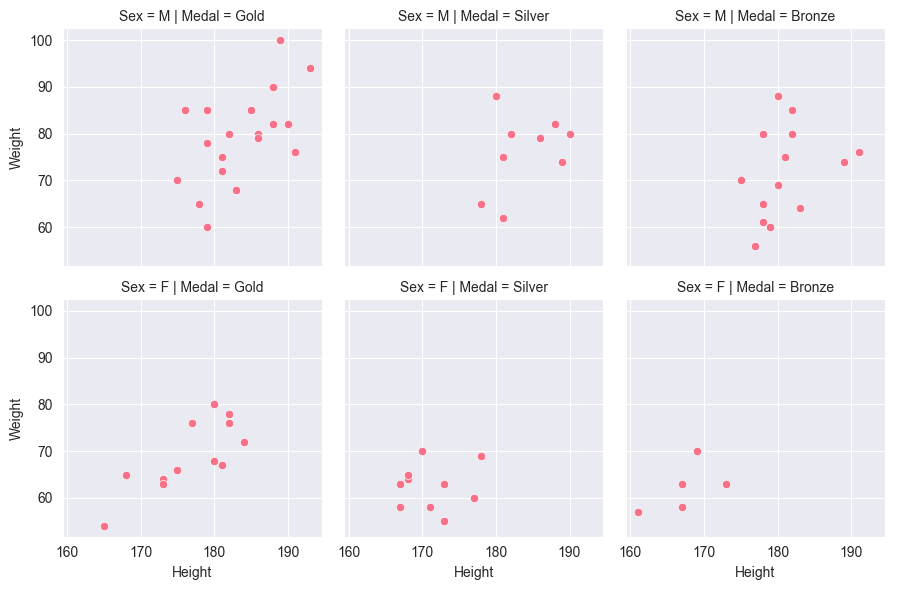

In [162]:
g = sns.FacetGrid(gdv_le4_norway, col="Medal",  row="Sex")
g.map(sns.scatterplot, "Height", "Weight")
g.add_legend()
plt.show()

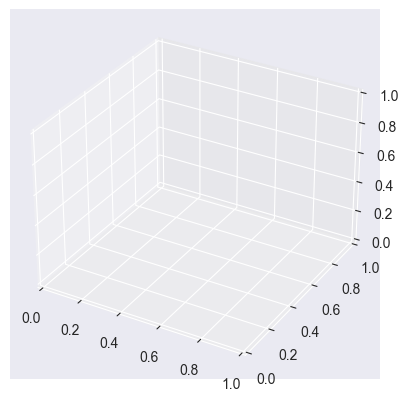

In [163]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [164]:
olympics_gymnastics = olympics[olympics['Sport'] == 'Gymnastics']

/opt/homebrew/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 1552 rows containing missing values.


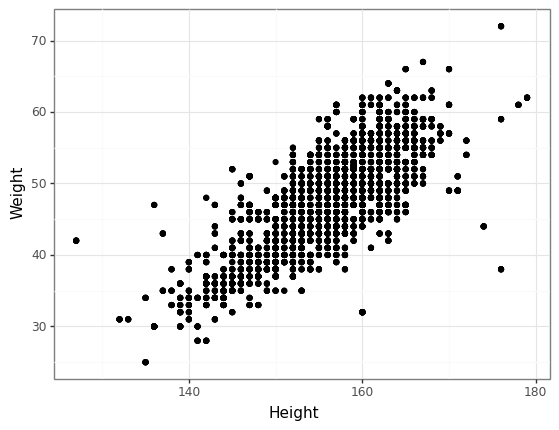

<ggplot: (695534270)>

In [165]:
(ggplot(olympics_gymnastics[olympics_gymnastics['Sex']=='F'], 
        aes('Height', 'Weight')) 
        + geom_point()
        + theme_bw())

/opt/homebrew/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 1552 rows containing missing values.


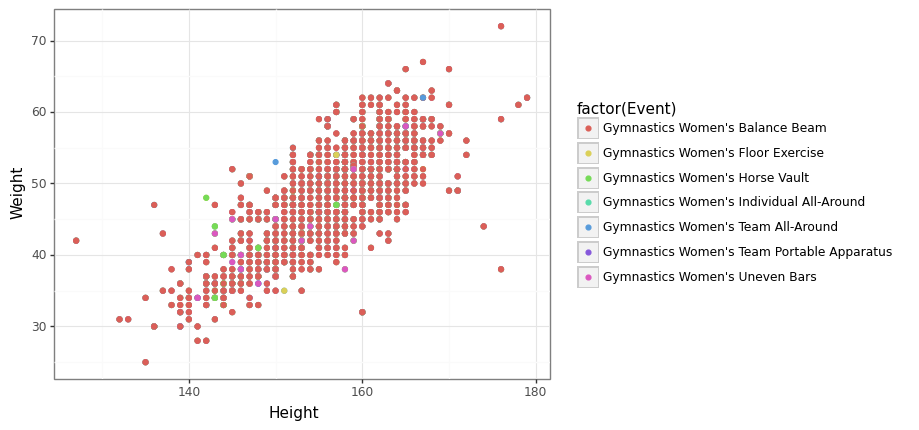

<ggplot: (381786215)>

In [166]:
(ggplot(olympics_gymnastics[olympics_gymnastics['Sex']=='F'], 
        aes('Height', 'Weight', color='factor(Event)'))
        + geom_point()
        + theme_bw())

/opt/homebrew/lib/python3.9/site-packages/plotnine/scales/scale_size.py:48: PlotnineWarning: Using size for a discrete variable is not advised.
/opt/homebrew/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 8621 rows containing missing values.
/opt/homebrew/lib/python3.9/site-packages/plotnine/guides/guides.py:253: PlotnineWarning: geom_point legend : Removed 1 rows containing missing values.


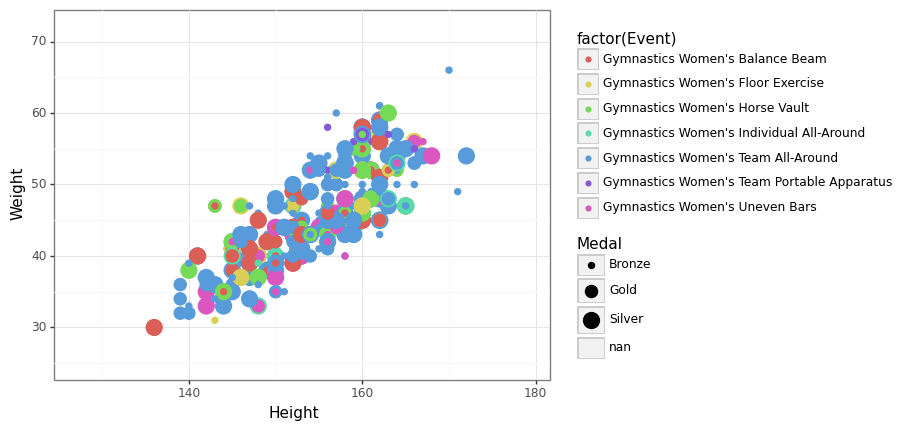

<ggplot: (708377125)>

In [167]:
(ggplot(olympics_gymnastics[olympics_gymnastics['Sex']=='F'], 
        aes('Height', 'Weight',
            color='factor(Event)', size = 'Medal'))
        + geom_point()
        + theme_bw())

/opt/homebrew/lib/python3.9/site-packages/plotnine/scales/scale_size.py:48: PlotnineWarning: Using size for a discrete variable is not advised.
/opt/homebrew/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 25546 rows containing missing values.
/opt/homebrew/lib/python3.9/site-packages/plotnine/guides/guides.py:253: PlotnineWarning: geom_point legend : Removed 1 rows containing missing values.


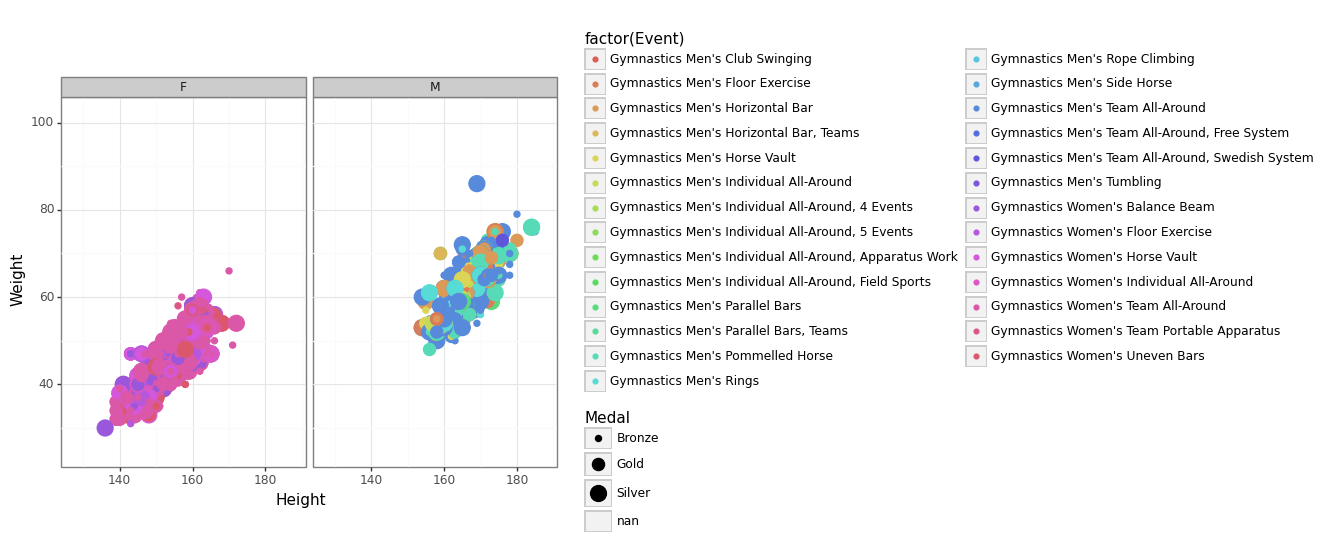

<ggplot: (708418286)>

In [168]:
(ggplot(olympics_gymnastics,  
        aes('Height', 'Weight', 
            color='factor(Event)', 
            size='Medal'))
        + geom_point() 
        + facet_wrap('~Sex') 
        + theme_bw())

# LE5 Evaluation

### Before Feedback

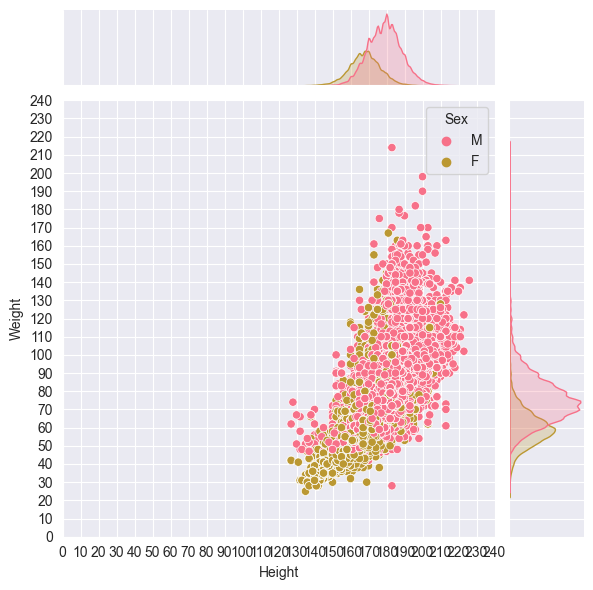

In [169]:
sns.jointplot(data=olympics, x="Height", y="Weight", hue="Sex", color="#FF0000")
plt.xticks(np.arange(0, 250, 10))
plt.yticks(np.arange(0, 250, 10))
plt.show()

### After Feedback

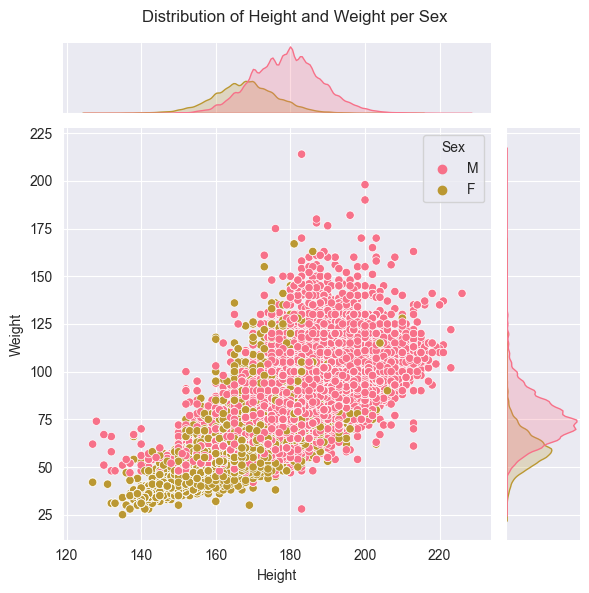

In [170]:
p = sns.jointplot(data=olympics, x="Height", y="Weight", hue="Sex")
p.fig.suptitle("Distribution of Height and Weight per Sex")
p.fig.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

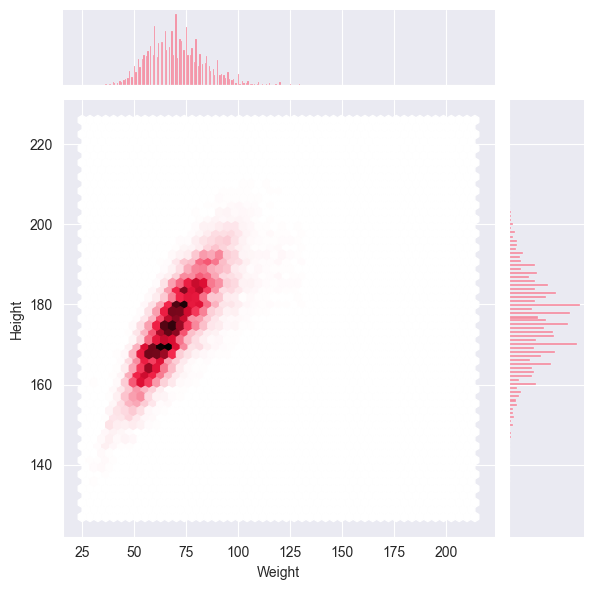

In [171]:
plt.figure(figsize=(14,7))
ax = sns.jointplot(y='Height', x='Weight', data=olympics, kind='hex')
plt.show()

(140.0, 210.0)

<Figure size 1400x700 with 0 Axes>

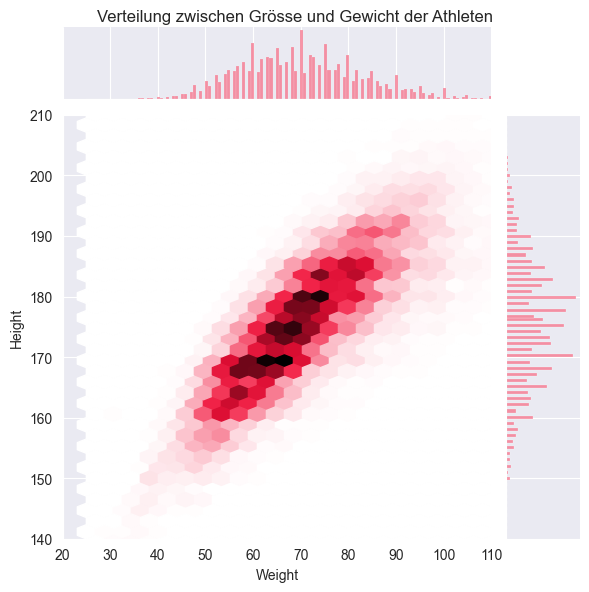

In [172]:
plt.figure(figsize=(14,7))
ax = sns.jointplot(y='Height', x='Weight', data=olympics, kind='hex')
ax.fig.suptitle("Verteilung zwischen Grösse und Gewicht der Athleten")
ax.fig.tight_layout()
ax.fig.subplots_adjust(top=0.95)
ax.ax_marg_x.set_xlim(20, 110)
ax.ax_marg_y.set_ylim(140, 210)

# diverse Plots

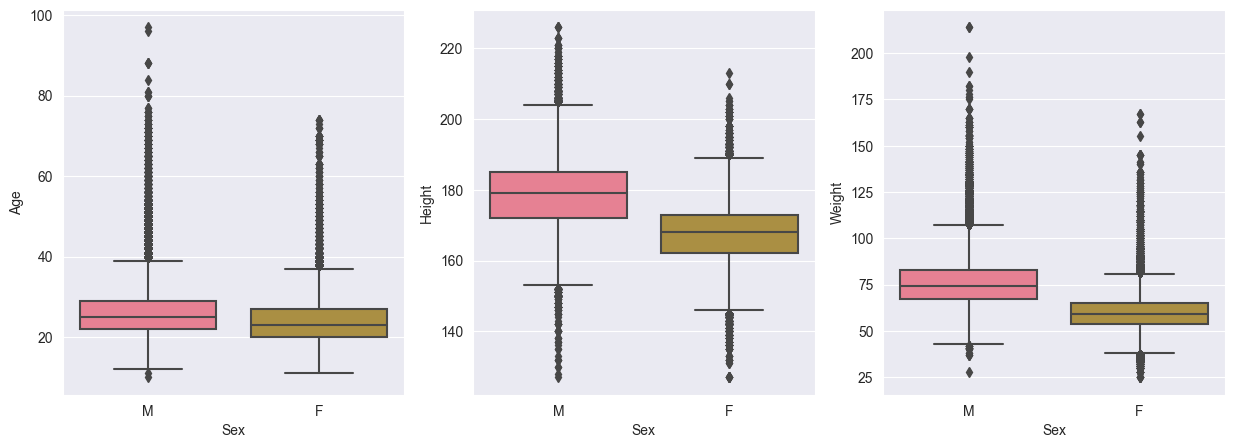

In [173]:
f, axes = plt.subplots(1, 3)
f.set_size_inches(15, 5)
sns.boxplot(x='Sex', y='Age', data=olympics, ax=axes[0])
sns.boxplot(x='Sex', y='Height', data=olympics, ax=axes[1])
sns.boxplot(x='Sex', y='Weight', data=olympics, ax=axes[2])
plt.show()

Wie man in den obigen Boxplots sehen kann, gibt es viele Ausreisser. Die Olympischen Spiele zeichnen sich durch eine grosse Vielfalt an Disziplinen aus, daher sind solche erheblichen Abweichungen gerechtfertigt. Wie auch immer, wir werden uns auf dieses Thema im weiteren Teil des Notizbuchs konzentrieren.

Das Diagramm zeigt uns, dass das Durchschnittsalter der Männer höher ist als das Durchschnittsalter der Frauen. Frauen sind durchschnittlich grösser als Männer und ihr Durchschnittsgewicht ist auch geringer als das Männergewicht.

In [174]:
max_age = olympics['Age'].max()
min_age = olympics['Age'].min()
olympics.loc[olympics['Age'].isin([min_age, max_age])]

ID                    Name Sex   Age  Height  Weight  \
142882   71691      Dimitrios Loundras   M  10.0     NaN     NaN   
257054  128719  John Quincy Adams Ward   M  97.0     NaN     NaN   

                                 Team  NOC        Games  Year  Season  \
142882  Ethnikos Gymnastikos Syllogos  GRE  1896 Summer  1896  Summer   
257054                  United States  USA  1928 Summer  1928  Summer   

             City             Sport  \
142882     Athina        Gymnastics   
257054  Amsterdam  Art Competitions   

                                              Event   Medal  
142882        Gymnastics Men's Parallel Bars, Teams  Bronze  
257054  Art Competitions Mixed Sculpturing, Statues     NaN

Wie wir aus dem oberen Rahmen sehen können, war Dimitrios Loundras der jüngste Olympiateilnehmer, der an den Olympischen Spielen 1896 teilnahm. Der älteste Olympiateilnehmer war der 97-jährige John Quincy Adams Ward, der an den Olympischen Spielen 1928 teilnahm.

https://en.wikipedia.org/wiki/Dimitrios_Loundras

https://en.wikipedia.org/wiki/John_Quincy_Adams_Ward

In [175]:
min_height = olympics['Height'].min()
max_height = olympics['Height'].max()
olympics.loc[olympics['Height'].isin([min_height,max_height])]

ID                   Name Sex   Age  Height  Weight    Team  NOC  \
29333    15150        Rosario Briones   F  15.0   127.0    42.0  Mexico  MEX   
29334    15150        Rosario Briones   F  15.0   127.0    42.0  Mexico  MEX   
29335    15150        Rosario Briones   F  15.0   127.0    42.0  Mexico  MEX   
29336    15150        Rosario Briones   F  15.0   127.0    42.0  Mexico  MEX   
29337    15150        Rosario Briones   F  15.0   127.0    42.0  Mexico  MEX   
29338    15150        Rosario Briones   F  15.0   127.0    42.0  Mexico  MEX   
164821   82769  Lyton Levison Mphande   M  25.0   127.0    62.0  Malawi  MAW   
265040  132627               Yao Ming   M  20.0   226.0   141.0   China  CHN   
265041  132627               Yao Ming   M  23.0   226.0   141.0   China  CHN   
265042  132627               Yao Ming   M  27.0   226.0   141.0   China  CHN   

              Games  Year  Season         City       Sport  \
29333   1968 Summer  1968  Summer  Mexico City  Gymnastics   
29334   1968 Summer  1968  Summer  Mexico City  Gymnastics   
29335   1968 Summer  1968  Summer  Mexico City  Gymnastics   
29336   1968 Summer  1968  Summer  Mexico City  Gymnastics   
29337   1968 Summer  1968  Summer  Mexico City  Gymnastics   
29338   1968 Summer  1968  Summer  Mexico City  Gymnastics   
164821  1988 Summer  1988  Summer        Seoul      Boxing   
265040  2000 Summer  2000  Summer       Sydney  Basketball   
265041  2004 Summer  2004  Summer       Athina  Basketball   
265042  2008 Summer  2008  Summer      Beijing  Basketball   

                                           Event Medal  
29333   Gymnastics Women's Individual All-Around   NaN  
29334         Gymnastics Women's Team All-Around   NaN  
29335          Gymnastics Women's Floor Exercise   NaN  
29336             Gymnastics Women's Horse Vault   NaN  
29337             Gymnastics Women's Uneven Bars   NaN  
29338            Gymnastics Women's Balance Beam   NaN  
164821           Boxing Men's Light-Welterweight   NaN  
265040               Basketball Men's Basketball   NaN  
265041               Basketball Men's Basketball   NaN  
265042               Basketball Men's Basketball   NaN

Die kleinste Olympiateilnehmerin war Rosario Briones mit einer Körpergrösse 127 cm. Sie war 15 Jahre alt, daher war ihre Grösse für dieses Alter normal. Der grösste Olympiateilnehmer war Yao Ming mit 226 cm Körpergröße, der Basketball spielte.

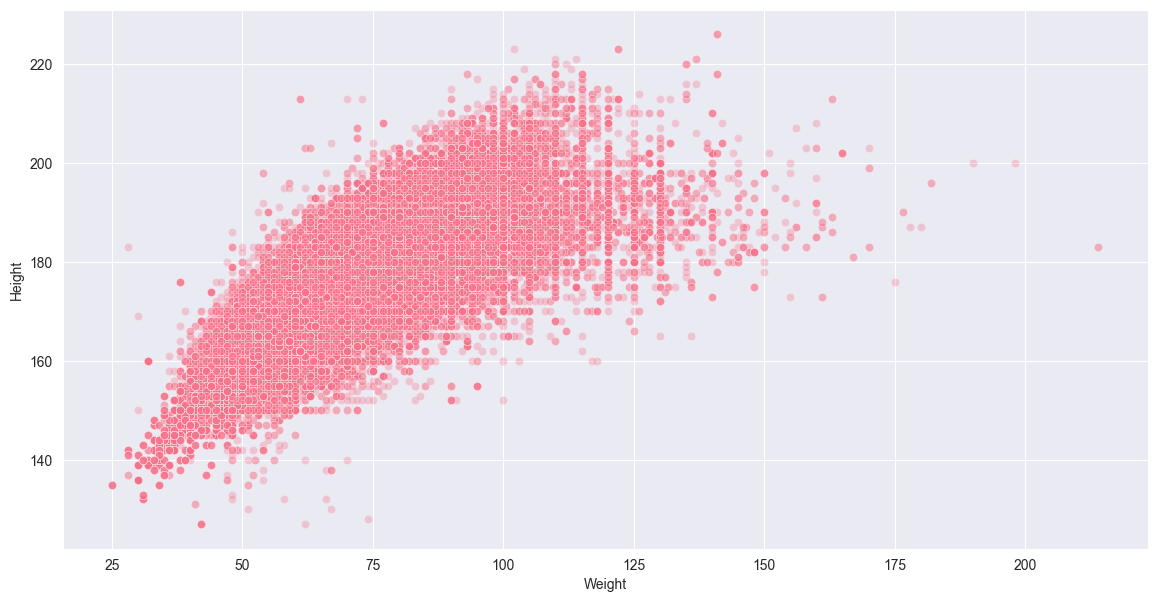

In [176]:
plt.figure(figsize=(14,7))
ax = sns.scatterplot(y='Height', x='Weight', data=olympics, alpha=0.3)
plt.show()

In [177]:
olympics[['Weight', 'Height']].corr()

Weight    Height
Weight  1.000000  0.796213
Height  0.796213  1.000000

Aus dem Diagramm können wir annehmen, dass das Gewicht von der Körpergrösse abhängt. Pearsons Korrelation bestätigt meine Annahmen. Es gibt eine positive Korrelation zwischen Gewicht und Grösse.

In [178]:
Sport_Count=olympics.groupby('Sport').apply(lambda x:x['Year'].unique()).to_frame().reset_index()
Sport_Count.columns=['Sport','Years']
Sport_Count['Count']=[len(c) for c in Sport_Count['Years']]

In [179]:
Sport_Count = Sport_Count.sort_values(by='Count', ascending=False)

In [180]:
Sport_Count.head(10)

Sport                                              Years  Count
27  Gymnastics  [1948, 1952, 1920, 2016, 1900, 1960, 2000, 197...     29
5    Athletics  [1932, 2000, 1936, 1912, 2012, 1920, 1924, 192...     29
22     Fencing  [1912, 2008, 2004, 1968, 1992, 1948, 1952, 193...     29
19     Cycling  [1956, 1924, 2004, 2000, 2016, 1972, 1980, 198...     29
54    Swimming  [1952, 1912, 1920, 1924, 1996, 2000, 1936, 200...     29
65   Wrestling  [2000, 2004, 1992, 1996, 1964, 2012, 1948, 198...     28
43      Rowing  [1996, 2000, 2016, 2012, 1984, 1988, 1992, 198...     28
20      Diving  [2000, 1952, 2016, 1936, 1948, 2008, 2012, 198...     27
47    Shooting  [1936, 1948, 1952, 1956, 1960, 1992, 1984, 200...     27
24    Football  [1920, 1996, 1960, 2000, 2004, 2008, 1928, 190...     27

In [181]:
Sport_Count.tail(10)

Sport   Years  Count
45         Rugby Sevens  [2016]      1
42                Roque  [1904]      1
40             Racquets  [1908]      1
37         Motorboating  [1908]      1
35  Military Ski Patrol  [1924]      1
31         Jeu De Paume  [1908]      1
16              Croquet  [1900]      1
15              Cricket  [1900]      1
9         Basque Pelota  [1900]      1
0           Aeronautics  [1936]      1

In [182]:
sports = olympics[olympics['Sport'].isin(Sport_Count.Sport[:10])]

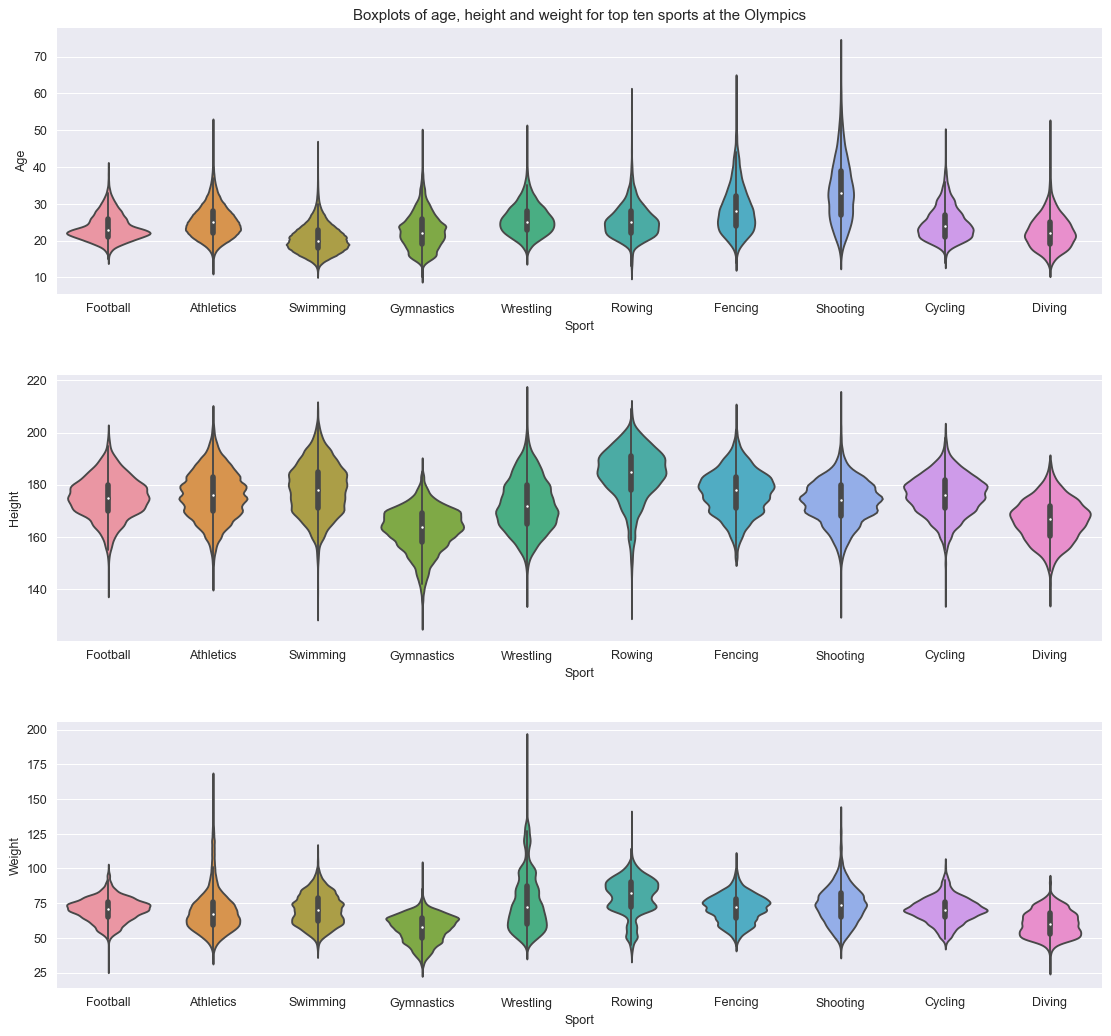

In [183]:
plt.figure(figsize=(15,12), dpi=90)

plt.subplot(311)
plt.title('Boxplots of age, height and weight for top ten sports at the Olympics')
ax=sns.violinplot(x='Sport',y='Age',data=sports)

plt.subplot(312)
ax=sns.violinplot(x='Sport',y='Height',data=sports)

plt.subplot(313)
ax=sns.violinplot(x='Sport',y='Weight',data=sports)

plt.subplots_adjust(wspace = 1, hspace = 0.3,top = 1)

plt.show()

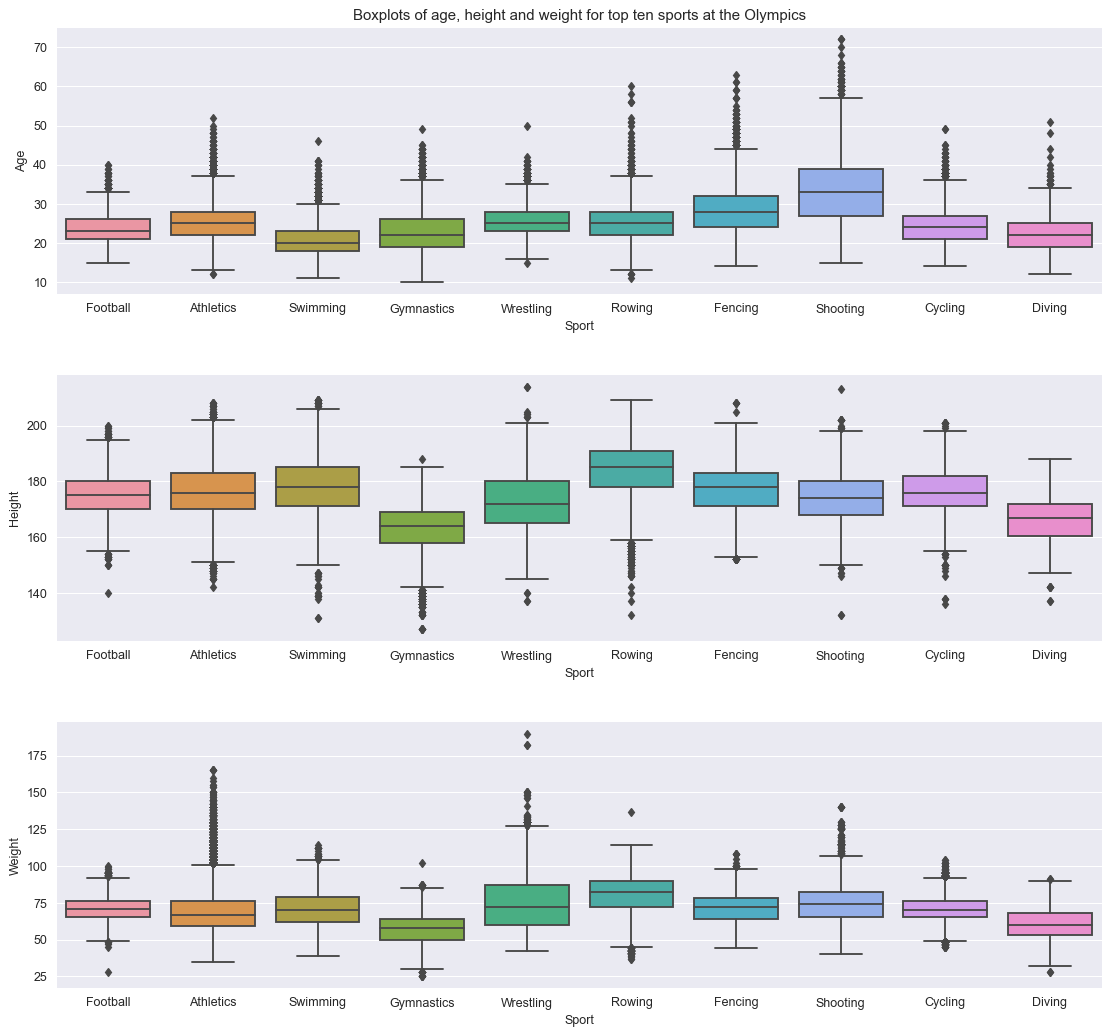

In [184]:
plt.figure(figsize=(15,12), dpi=90)

sns.set_style('darkgrid')

plt.subplot(311)
plt.title('Boxplots of age, height and weight for top ten sports at the Olympics')
ax=sns.boxplot(x='Sport',y='Age',data=sports)

plt.subplot(312)
ax=sns.boxplot(x='Sport',y='Height',data=sports)

plt.subplot(313)
ax=sns.boxplot(x='Sport',y='Weight',data=sports)

plt.subplots_adjust(wspace = 1, hspace = 0.3,top = 1)

Die Sportart Schiesssen zeichnet sich unter anderen Sportarten durch das höchste Alter aus. Turnen zeichnet sich unter anderen Sportarten durch die geringste Körpergrösse und auch das geringste Gewicht aus. Es scheint logisch, weil eine Person agil sein muss, daher ist ein geringes Gewicht ein wünschenswertes Merkmal.

In [185]:
medals_by_year = olympics.groupby(['Year', 'Medal'])['Medal'].count()
medals_by_year = medals_by_year.reset_index(level=[1], name='Count')

In [186]:
medals_by_year.head()

Medal  Count
Year               
1896  Bronze     38
1896    Gold     62
1896  Silver     43
1900  Bronze    175
1900    Gold    201

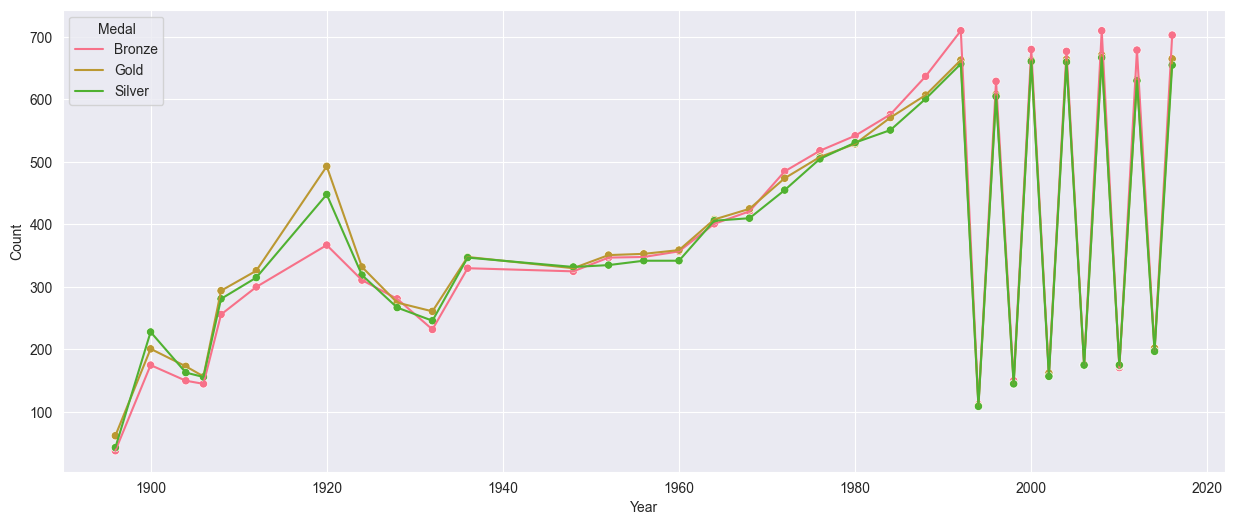

In [187]:
plt.figure(figsize=(15,6))
sns.set_style('darkgrid')
ax = sns.scatterplot(x=medals_by_year.index, y='Count', hue='Medal', data=medals_by_year, legend=False)
ax = sns.lineplot(x=medals_by_year.index, y='Count', hue='Medal', data=medals_by_year)
plt.show()

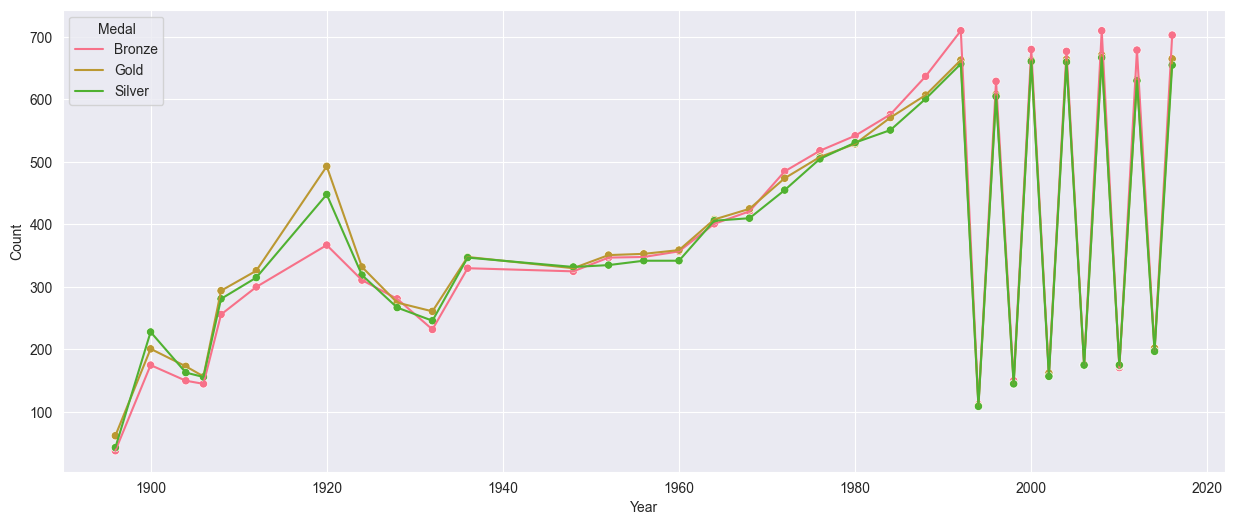

In [188]:
plt.figure(figsize=(15,6))
sns.set_style('darkgrid')
ax = sns.scatterplot(x=medals_by_year.index, y='Count', hue='Medal', data=medals_by_year, legend=False)
ax = sns.lineplot(x=medals_by_year.index, y='Count', hue='Medal', data=medals_by_year)
plt.show()